In [1]:
%pip install radtraq

Note: you may need to restart the kernel to use updated packages.


In [33]:
conda install -c conda-forge arm_pyart -y

usage: conda [-h] [-V] command ...
conda: error: unrecognized arguments: install arm_pyart

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import act.io.armfiles

In [3]:
import matplotlib.pyplot as plt
import xarray as xr
from netCDF4 import Dataset
import netCDF4
import pyart
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import metpy
from matplotlib.dates import DateFormatter


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [4]:
from pyart.testing import get_test_data
import fsspec
from metpy.plots import USCOUNTIES
import warnings
warnings.filterwarnings("ignore")
import glob
import os

In [63]:
ds = xr.open_mfdataset('/Users/adamabdelhak/Downloads/crocus-neiu-mrrpro-a1-20230601.000000.nc')

In [64]:
ds

<xarray.Dataset>
Dimensions:                 (range: 256, sweep: 1, time: 360, n_spectra: 256,
                             spectrum_n_samples: 32)
Coordinates:
  * range                   (range) float32 0.0 35.0 70.0 ... 8.89e+03 8.925e+03
  * time                    (time) datetime64[ns] 2023-06-01T00:00:00.0010951...
    elevation               (time) float32 dask.array<chunksize=(360,), meta=np.ndarray>
    azimuth                 (time) float32 dask.array<chunksize=(360,), meta=np.ndarray>
Dimensions without coordinates: sweep, n_spectra, spectrum_n_samples
Data variables: (12/31)
    volume_number           int32 ...
    time_coverage_start     |S128 ...
    time_coverage_end       |S128 ...
    time_reference          |S128 ...
    instrument_type         |S128 ...
    transfer_function       (range) float64 dask.array<chunksize=(256,), meta=np.ndarray>
    ...                      ...
    ML                      (time, range) float64 dask.array<chunksize=(360, 256), meta=np.ndarray>
    SNR                     (time, range) float32 dask.array<chunksize=(360, 256), meta=np.ndarray>
    index_spectra           (time, range) float64 dask.array<chunksize=(360, 256), meta=np.ndarray>
    spectrum_raw            (time, n_spectra, spectrum_n_samples) float64 dask.array<chunksize=(360, 256, 32), meta=np.ndarray>
    N                       (time, n_spectra, spectrum_n_samples) float64 dask.array<chunksize=(360, 256, 32), meta=np.ndarray>
    D                       (n_spectra, spectrum_n_samples) float64 dask.array<chunksize=(256, 32), meta=np.ndarray>
Attributes:
    Conventions:      CF/Radial
    version:          1.3
    title:            METEK MRR Pro 1.2.5 Data
    institution:      
    references:       
    source:           
    history:          
    comment:          
    instrument_name:  METEK MRR Pro 1.2.5, ID: MRRPro97, METEK Serial Number:...
    site_name:        cms-mrr-002
    field_names:      Za,Z,Zea,Ze,RR,LWC,PIA,VEL,WIDTH,SNR,spectrum_reflectiv...

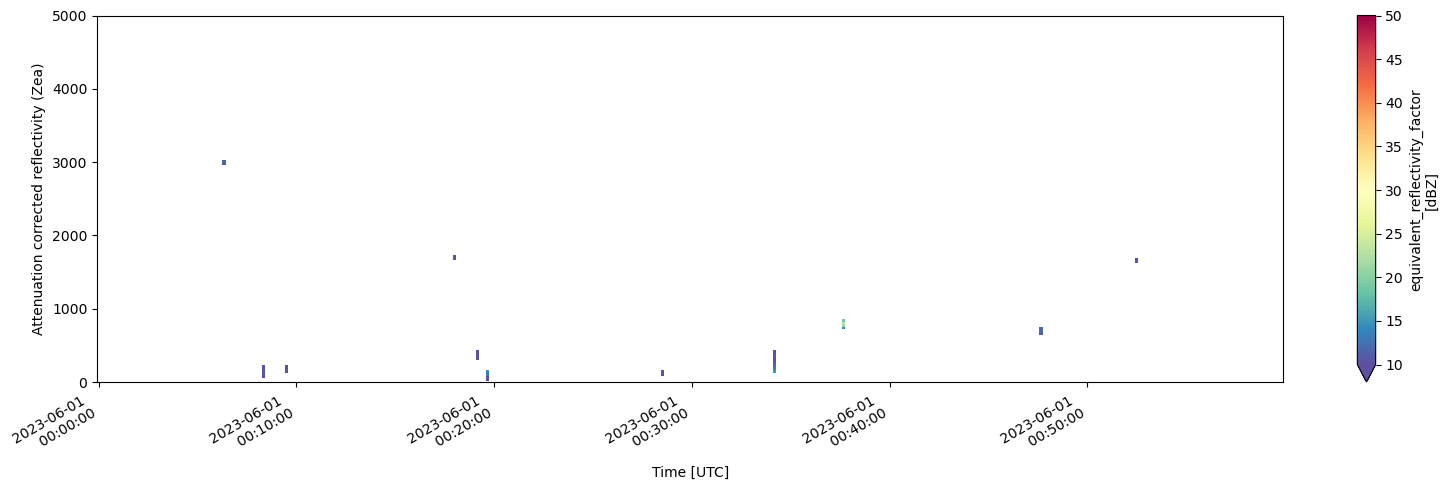

In [65]:
fig = plt.figure(figsize=(16,5))
ds["Ze"].T.plot(cmap='Spectral_r', vmin=10, vmax=50)
plt.xlabel('Time [UTC]'), plt.ylabel('Attenuation corrected reflectivity (Zea)')
plt.ylim(0, 5000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
plt.tight_layout()
plt.savefig("June_1_mrr.png",dpi=500)

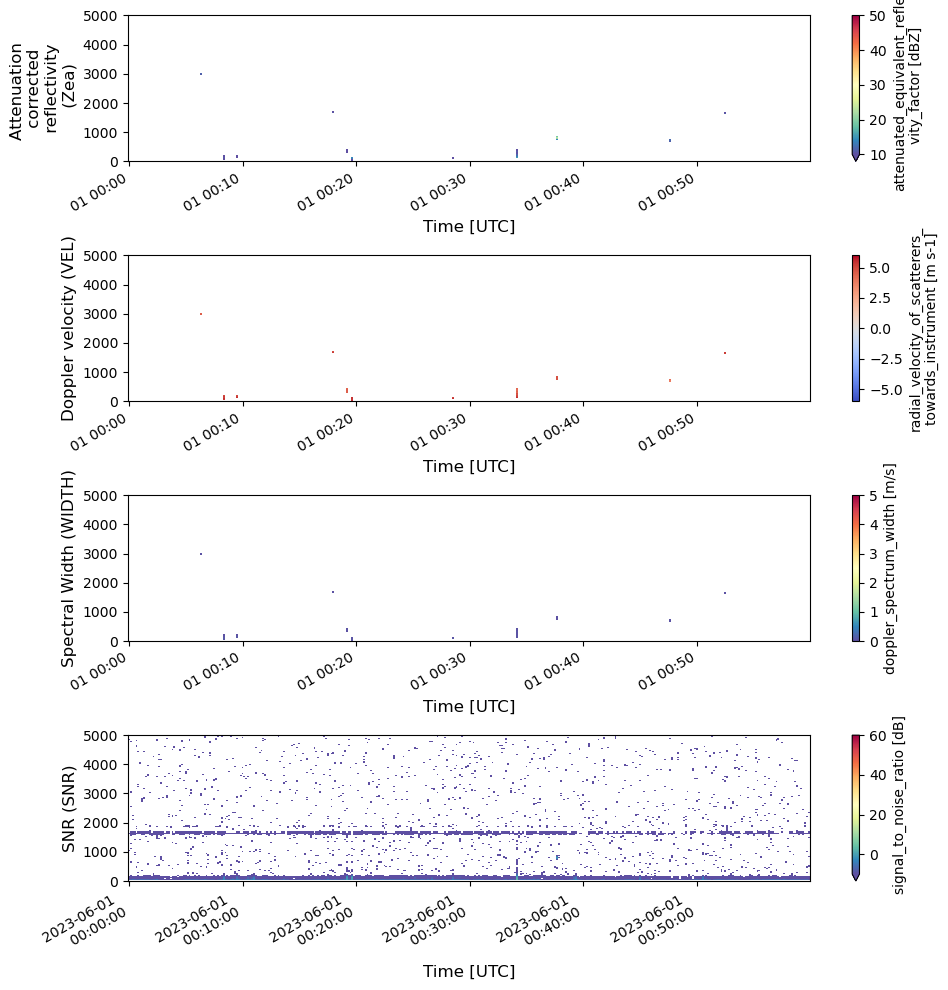

In [66]:
fig, ax = plt.subplots(4, 1, figsize=(10, 10))
ds["Zea"].T.plot(cmap='Spectral_r', vmin=10, vmax=50, ax=ax[0])
ax[0].set_xlabel('Time [UTC]', fontsize=12), ax[0].set_ylabel('Attenuation \n corrected \n reflectivity \n (Zea)', fontsize=12)
ax[0].set_ylim(0, 5000)
ds["VEL"].T.plot(cmap='coolwarm', vmin=-6, vmax=6, ax=ax[1])
ax[1].set_xlabel('Time [UTC]', fontsize=12), ax[1].set_ylabel('Doppler velocity (VEL)', fontsize=12)
ax[1].set_ylim(0, 5000)
ds["WIDTH"].T.plot(cmap='Spectral_r', vmin=0, vmax=5, ax=ax[2])
ax[2].set_xlabel('Time [UTC]', fontsize=12), ax[2].set_ylabel('Spectral Width (WIDTH)', fontsize=12)
ax[2].set_ylim(0, 5000)
ds["SNR"].T.plot(cmap='Spectral_r', vmin=-10, vmax=60, ax=ax[3])
ax[3].set_xlabel('Time [UTC]', fontsize=12), ax[3].set_ylabel('SNR (SNR)', fontsize=12)
ax[3].set_ylim(0, 5000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
fig.tight_layout()

In [34]:
ds = xr.open_mfdataset('/Users/adamabdelhak/Downloads/crocus-neiu-mrrpro-a1-20230602.000000.nc')

In [35]:
ds

<xarray.Dataset>
Dimensions:                 (range: 256, sweep: 1, time: 360, n_spectra: 256,
                             spectrum_n_samples: 32)
Coordinates:
  * range                   (range) float32 0.0 35.0 70.0 ... 8.89e+03 8.925e+03
  * time                    (time) datetime64[ns] 2023-06-02T00:00:00.0010859...
    elevation               (time) float32 dask.array<chunksize=(360,), meta=np.ndarray>
    azimuth                 (time) float32 dask.array<chunksize=(360,), meta=np.ndarray>
Dimensions without coordinates: sweep, n_spectra, spectrum_n_samples
Data variables: (12/31)
    volume_number           int32 ...
    time_coverage_start     |S128 ...
    time_coverage_end       |S128 ...
    time_reference          |S128 ...
    instrument_type         |S128 ...
    transfer_function       (range) float64 dask.array<chunksize=(256,), meta=np.ndarray>
    ...                      ...
    ML                      (time, range) float64 dask.array<chunksize=(360, 256), meta=np.ndarray>
    SNR                     (time, range) float32 dask.array<chunksize=(360, 256), meta=np.ndarray>
    index_spectra           (time, range) float64 dask.array<chunksize=(360, 256), meta=np.ndarray>
    spectrum_raw            (time, n_spectra, spectrum_n_samples) float64 dask.array<chunksize=(360, 256, 32), meta=np.ndarray>
    N                       (time, n_spectra, spectrum_n_samples) float64 dask.array<chunksize=(360, 256, 32), meta=np.ndarray>
    D                       (n_spectra, spectrum_n_samples) float64 dask.array<chunksize=(256, 32), meta=np.ndarray>
Attributes:
    Conventions:      CF/Radial
    version:          1.3
    title:            METEK MRR Pro 1.2.5 Data
    institution:      
    references:       
    source:           
    history:          
    comment:          
    instrument_name:  METEK MRR Pro 1.2.5, ID: MRRPro97, METEK Serial Number:...
    site_name:        cms-mrr-002
    field_names:      Za,Z,Zea,Ze,RR,LWC,PIA,VEL,WIDTH,SNR,spectrum_reflectiv...

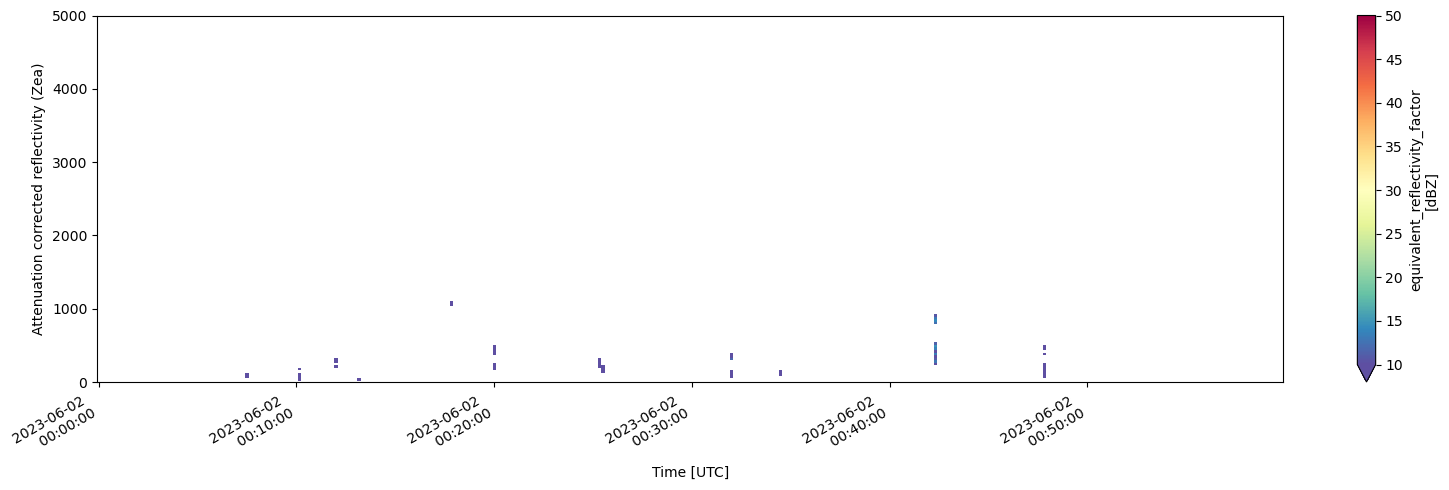

In [38]:
fig = plt.figure(figsize=(16,5))
ds["Ze"].T.plot(cmap='Spectral_r', vmin=10, vmax=50)
plt.xlabel('Time [UTC]'), plt.ylabel('Attenuation corrected reflectivity (Zea)')
plt.ylim(0, 5000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
plt.tight_layout()
plt.savefig("June_2_mrr.png",dpi=500)

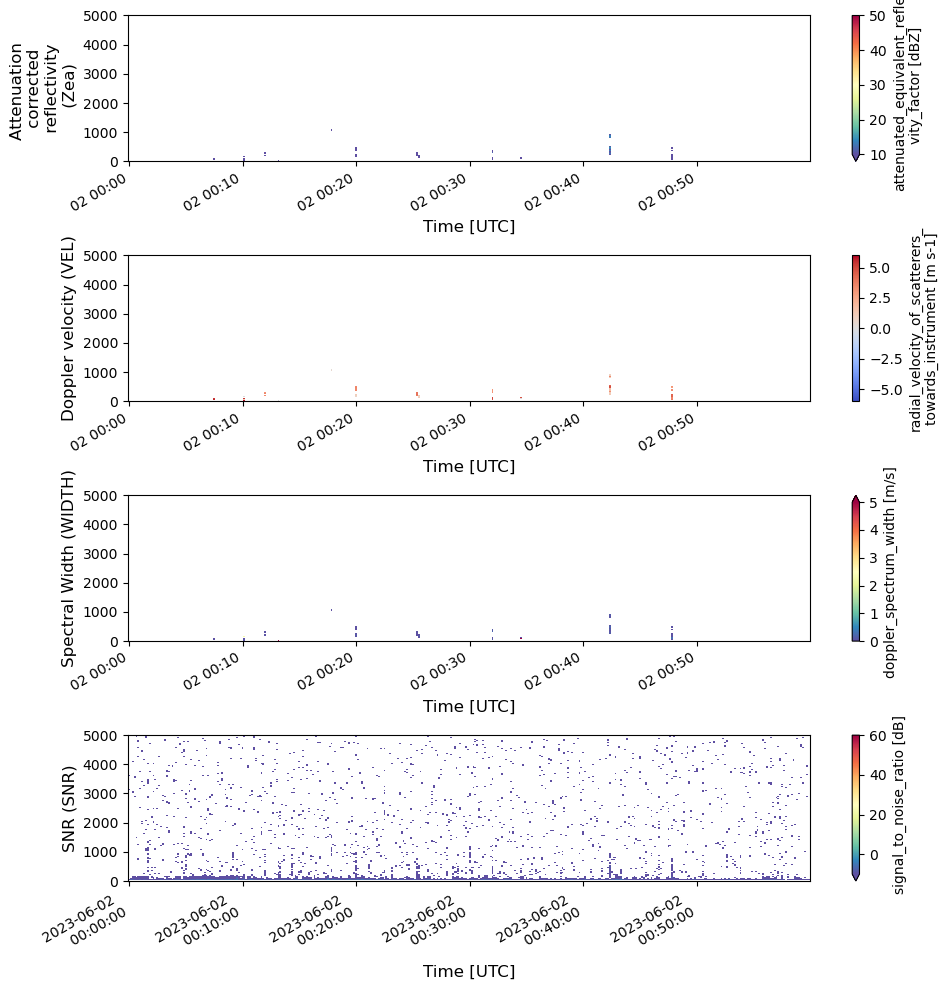

In [37]:
fig, ax = plt.subplots(4, 1, figsize=(10, 10))
ds["Zea"].T.plot(cmap='Spectral_r', vmin=10, vmax=50, ax=ax[0])
ax[0].set_xlabel('Time [UTC]', fontsize=12), ax[0].set_ylabel('Attenuation \n corrected \n reflectivity \n (Zea)', fontsize=12)
ax[0].set_ylim(0, 5000)
ds["VEL"].T.plot(cmap='coolwarm', vmin=-6, vmax=6, ax=ax[1])
ax[1].set_xlabel('Time [UTC]', fontsize=12), ax[1].set_ylabel('Doppler velocity (VEL)', fontsize=12)
ax[1].set_ylim(0, 5000)
ds["WIDTH"].T.plot(cmap='Spectral_r', vmin=0, vmax=5, ax=ax[2])
ax[2].set_xlabel('Time [UTC]', fontsize=12), ax[2].set_ylabel('Spectral Width (WIDTH)', fontsize=12)
ax[2].set_ylim(0, 5000)
ds["SNR"].T.plot(cmap='Spectral_r', vmin=-10, vmax=60, ax=ax[3])
ax[3].set_xlabel('Time [UTC]', fontsize=12), ax[3].set_ylabel('SNR (SNR)', fontsize=12)
ax[3].set_ylim(0, 5000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
fig.tight_layout()

In [39]:
ds = xr.open_mfdataset('/Users/adamabdelhak/Downloads/crocus-neiu-mrrpro-a1-20230603.000000.nc')

In [40]:
ds

<xarray.Dataset>
Dimensions:                 (range: 256, sweep: 1, time: 360, n_spectra: 256,
                             spectrum_n_samples: 32)
Coordinates:
  * range                   (range) float32 0.0 35.0 70.0 ... 8.89e+03 8.925e+03
  * time                    (time) datetime64[ns] 2023-06-03T00:00:00.0010841...
    elevation               (time) float32 dask.array<chunksize=(360,), meta=np.ndarray>
    azimuth                 (time) float32 dask.array<chunksize=(360,), meta=np.ndarray>
Dimensions without coordinates: sweep, n_spectra, spectrum_n_samples
Data variables: (12/31)
    volume_number           int32 ...
    time_coverage_start     |S128 ...
    time_coverage_end       |S128 ...
    time_reference          |S128 ...
    instrument_type         |S128 ...
    transfer_function       (range) float64 dask.array<chunksize=(256,), meta=np.ndarray>
    ...                      ...
    ML                      (time, range) float64 dask.array<chunksize=(360, 256), meta=np.ndarray>
    SNR                     (time, range) float32 dask.array<chunksize=(360, 256), meta=np.ndarray>
    index_spectra           (time, range) float64 dask.array<chunksize=(360, 256), meta=np.ndarray>
    spectrum_raw            (time, n_spectra, spectrum_n_samples) float64 dask.array<chunksize=(360, 256, 32), meta=np.ndarray>
    N                       (time, n_spectra, spectrum_n_samples) float64 dask.array<chunksize=(360, 256, 32), meta=np.ndarray>
    D                       (n_spectra, spectrum_n_samples) float64 dask.array<chunksize=(256, 32), meta=np.ndarray>
Attributes:
    Conventions:      CF/Radial
    version:          1.3
    title:            METEK MRR Pro 1.2.5 Data
    institution:      
    references:       
    source:           
    history:          
    comment:          
    instrument_name:  METEK MRR Pro 1.2.5, ID: MRRPro97, METEK Serial Number:...
    site_name:        cms-mrr-002
    field_names:      Za,Z,Zea,Ze,RR,LWC,PIA,VEL,WIDTH,SNR,spectrum_reflectiv...

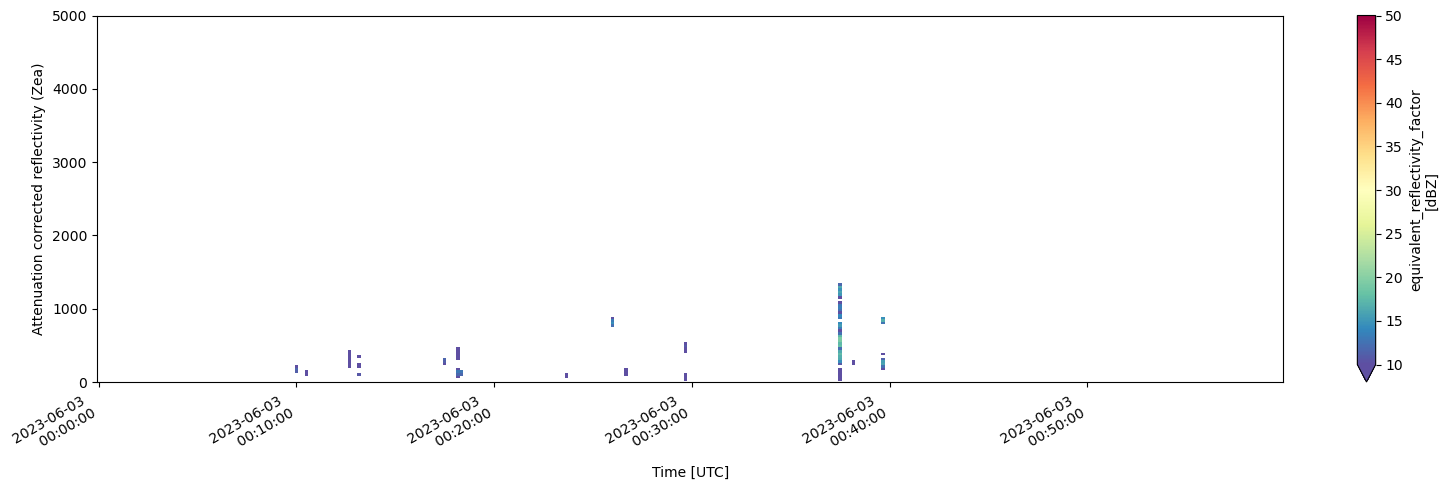

In [41]:
fig = plt.figure(figsize=(16,5))
ds["Ze"].T.plot(cmap='Spectral_r', vmin=10, vmax=50)
plt.xlabel('Time [UTC]'), plt.ylabel('Attenuation corrected reflectivity (Zea)')
plt.ylim(0, 5000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
plt.tight_layout()
plt.savefig("June_3_mrr.png",dpi=500)

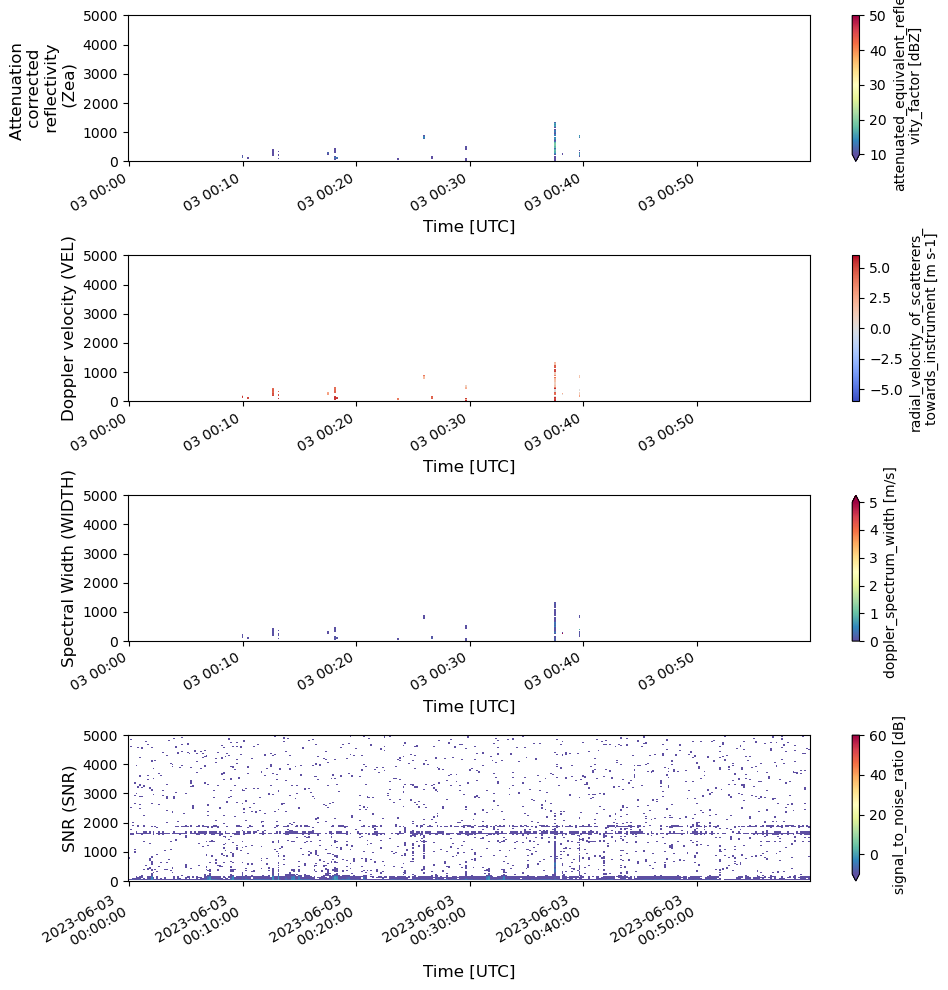

In [42]:
fig, ax = plt.subplots(4, 1, figsize=(10, 10))
ds["Zea"].T.plot(cmap='Spectral_r', vmin=10, vmax=50, ax=ax[0])
ax[0].set_xlabel('Time [UTC]', fontsize=12), ax[0].set_ylabel('Attenuation \n corrected \n reflectivity \n (Zea)', fontsize=12)
ax[0].set_ylim(0, 5000)
ds["VEL"].T.plot(cmap='coolwarm', vmin=-6, vmax=6, ax=ax[1])
ax[1].set_xlabel('Time [UTC]', fontsize=12), ax[1].set_ylabel('Doppler velocity (VEL)', fontsize=12)
ax[1].set_ylim(0, 5000)
ds["WIDTH"].T.plot(cmap='Spectral_r', vmin=0, vmax=5, ax=ax[2])
ax[2].set_xlabel('Time [UTC]', fontsize=12), ax[2].set_ylabel('Spectral Width (WIDTH)', fontsize=12)
ax[2].set_ylim(0, 5000)
ds["SNR"].T.plot(cmap='Spectral_r', vmin=-10, vmax=60, ax=ax[3])
ax[3].set_xlabel('Time [UTC]', fontsize=12), ax[3].set_ylabel('SNR (SNR)', fontsize=12)
ax[3].set_ylim(0, 5000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
fig.tight_layout()

In [43]:
ds = xr.open_mfdataset('/Users/adamabdelhak/Downloads/crocus-neiu-mrrpro-a1-20230604.000000.nc')

In [44]:
ds

<xarray.Dataset>
Dimensions:                 (range: 256, sweep: 1, time: 360, n_spectra: 256,
                             spectrum_n_samples: 32)
Coordinates:
  * range                   (range) float32 0.0 35.0 70.0 ... 8.89e+03 8.925e+03
  * time                    (time) datetime64[ns] 2023-06-04T00:00:00.0010841...
    elevation               (time) float32 dask.array<chunksize=(360,), meta=np.ndarray>
    azimuth                 (time) float32 dask.array<chunksize=(360,), meta=np.ndarray>
Dimensions without coordinates: sweep, n_spectra, spectrum_n_samples
Data variables: (12/31)
    volume_number           int32 ...
    time_coverage_start     |S128 ...
    time_coverage_end       |S128 ...
    time_reference          |S128 ...
    instrument_type         |S128 ...
    transfer_function       (range) float64 dask.array<chunksize=(256,), meta=np.ndarray>
    ...                      ...
    ML                      (time, range) float64 dask.array<chunksize=(360, 256), meta=np.ndarray>
    SNR                     (time, range) float32 dask.array<chunksize=(360, 256), meta=np.ndarray>
    index_spectra           (time, range) float64 dask.array<chunksize=(360, 256), meta=np.ndarray>
    spectrum_raw            (time, n_spectra, spectrum_n_samples) float64 dask.array<chunksize=(360, 256, 32), meta=np.ndarray>
    N                       (time, n_spectra, spectrum_n_samples) float64 dask.array<chunksize=(360, 256, 32), meta=np.ndarray>
    D                       (n_spectra, spectrum_n_samples) float64 dask.array<chunksize=(256, 32), meta=np.ndarray>
Attributes:
    Conventions:      CF/Radial
    version:          1.3
    title:            METEK MRR Pro 1.2.5 Data
    institution:      
    references:       
    source:           
    history:          
    comment:          
    instrument_name:  METEK MRR Pro 1.2.5, ID: MRRPro97, METEK Serial Number:...
    site_name:        cms-mrr-002
    field_names:      Za,Z,Zea,Ze,RR,LWC,PIA,VEL,WIDTH,SNR,spectrum_reflectiv...

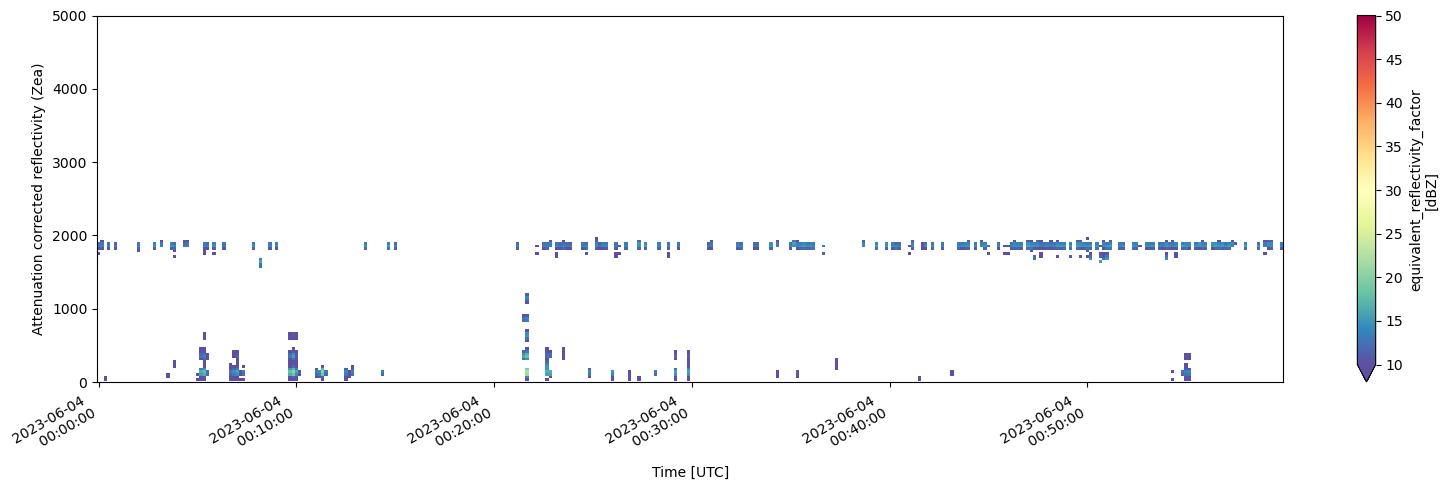

In [45]:
fig = plt.figure(figsize=(16,5))
ds["Ze"].T.plot(cmap='Spectral_r', vmin=10, vmax=50)
plt.xlabel('Time [UTC]'), plt.ylabel('Attenuation corrected reflectivity (Zea)')
plt.ylim(0, 5000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
plt.tight_layout()
plt.savefig("June_4_mrr.png",dpi=500)

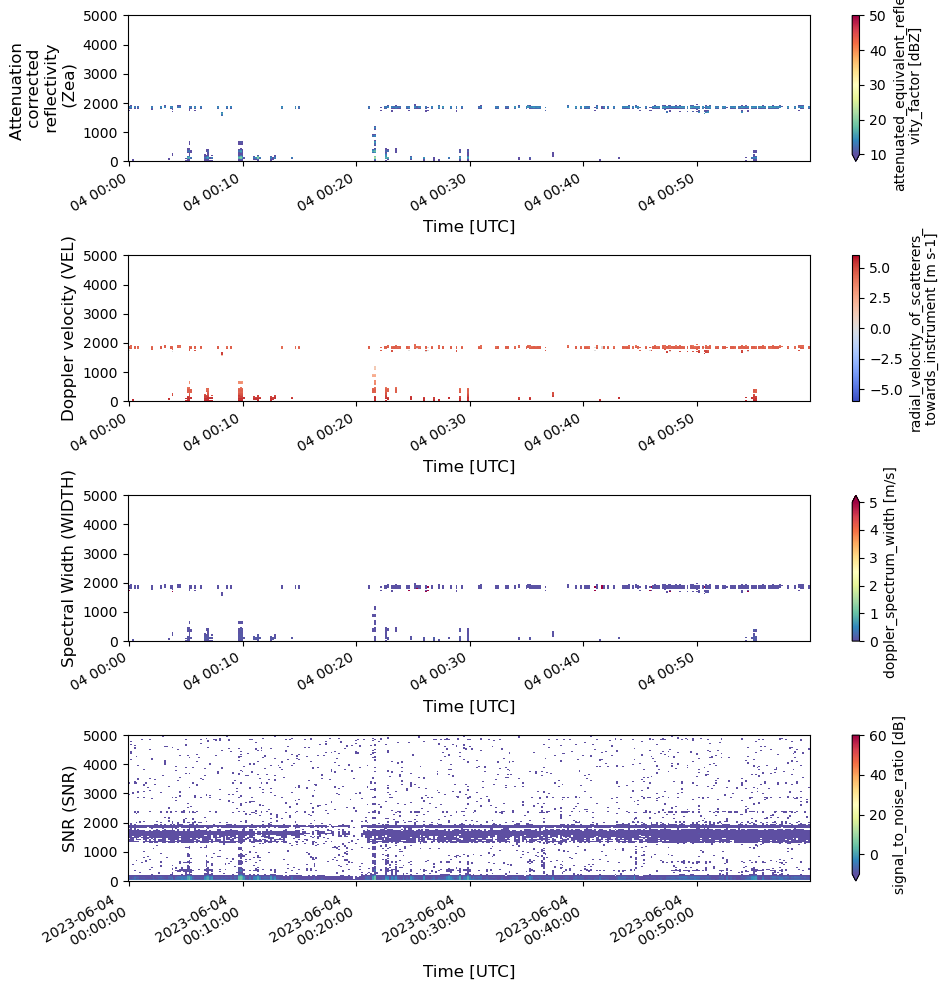

In [46]:
fig, ax = plt.subplots(4, 1, figsize=(10, 10))
ds["Zea"].T.plot(cmap='Spectral_r', vmin=10, vmax=50, ax=ax[0])
ax[0].set_xlabel('Time [UTC]', fontsize=12), ax[0].set_ylabel('Attenuation \n corrected \n reflectivity \n (Zea)', fontsize=12)
ax[0].set_ylim(0, 5000)
ds["VEL"].T.plot(cmap='coolwarm', vmin=-6, vmax=6, ax=ax[1])
ax[1].set_xlabel('Time [UTC]', fontsize=12), ax[1].set_ylabel('Doppler velocity (VEL)', fontsize=12)
ax[1].set_ylim(0, 5000)
ds["WIDTH"].T.plot(cmap='Spectral_r', vmin=0, vmax=5, ax=ax[2])
ax[2].set_xlabel('Time [UTC]', fontsize=12), ax[2].set_ylabel('Spectral Width (WIDTH)', fontsize=12)
ax[2].set_ylim(0, 5000)
ds["SNR"].T.plot(cmap='Spectral_r', vmin=-10, vmax=60, ax=ax[3])
ax[3].set_xlabel('Time [UTC]', fontsize=12), ax[3].set_ylabel('SNR (SNR)', fontsize=12)
ax[3].set_ylim(0, 5000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
fig.tight_layout()

In [47]:
ds = xr.open_mfdataset('/Users/adamabdelhak/Downloads/crocus-neiu-mrrpro-a1-20230605.000000.nc')

In [48]:
ds

<xarray.Dataset>
Dimensions:                 (range: 256, sweep: 1, time: 360, n_spectra: 256,
                             spectrum_n_samples: 32)
Coordinates:
  * range                   (range) float32 0.0 35.0 70.0 ... 8.89e+03 8.925e+03
  * time                    (time) datetime64[ns] 2023-06-05T00:00:00.0010890...
    elevation               (time) float32 dask.array<chunksize=(360,), meta=np.ndarray>
    azimuth                 (time) float32 dask.array<chunksize=(360,), meta=np.ndarray>
Dimensions without coordinates: sweep, n_spectra, spectrum_n_samples
Data variables: (12/31)
    volume_number           int32 ...
    time_coverage_start     |S128 ...
    time_coverage_end       |S128 ...
    time_reference          |S128 ...
    instrument_type         |S128 ...
    transfer_function       (range) float64 dask.array<chunksize=(256,), meta=np.ndarray>
    ...                      ...
    ML                      (time, range) float64 dask.array<chunksize=(360, 256), meta=np.ndarray>
    SNR                     (time, range) float32 dask.array<chunksize=(360, 256), meta=np.ndarray>
    index_spectra           (time, range) float64 dask.array<chunksize=(360, 256), meta=np.ndarray>
    spectrum_raw            (time, n_spectra, spectrum_n_samples) float64 dask.array<chunksize=(360, 256, 32), meta=np.ndarray>
    N                       (time, n_spectra, spectrum_n_samples) float64 dask.array<chunksize=(360, 256, 32), meta=np.ndarray>
    D                       (n_spectra, spectrum_n_samples) float64 dask.array<chunksize=(256, 32), meta=np.ndarray>
Attributes:
    Conventions:      CF/Radial
    version:          1.3
    title:            METEK MRR Pro 1.2.5 Data
    institution:      
    references:       
    source:           
    history:          
    comment:          
    instrument_name:  METEK MRR Pro 1.2.5, ID: MRRPro97, METEK Serial Number:...
    site_name:        cms-mrr-002
    field_names:      Za,Z,Zea,Ze,RR,LWC,PIA,VEL,WIDTH,SNR,spectrum_reflectiv...

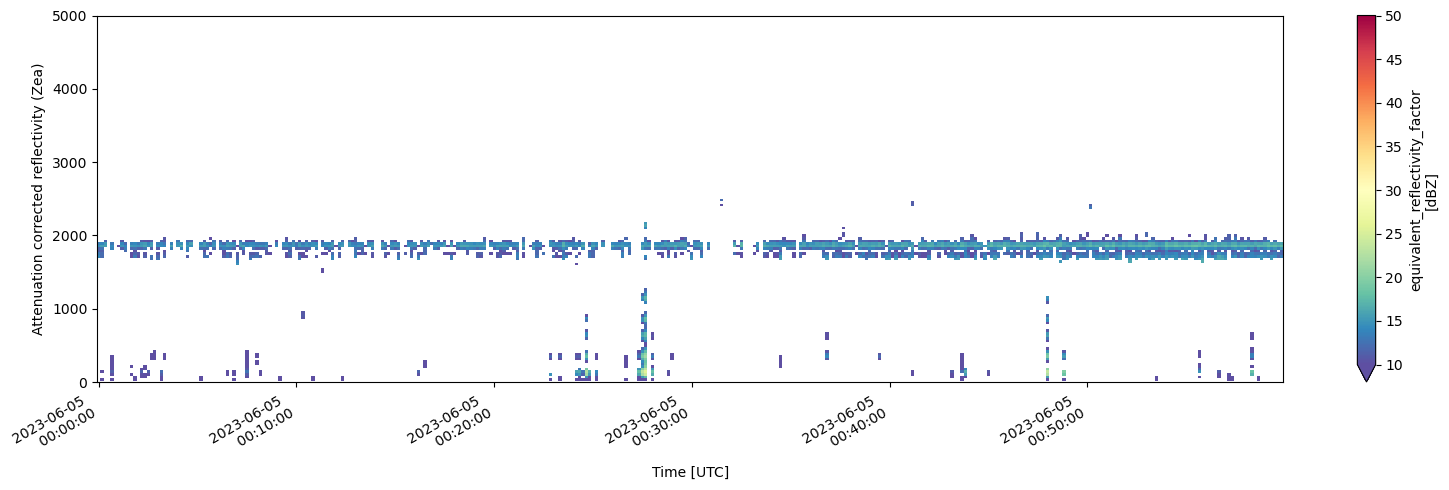

In [49]:
fig = plt.figure(figsize=(16,5))
ds["Ze"].T.plot(cmap='Spectral_r', vmin=10, vmax=50)
plt.xlabel('Time [UTC]'), plt.ylabel('Attenuation corrected reflectivity (Zea)')
plt.ylim(0, 5000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
plt.tight_layout()
plt.savefig("June_5_mrr.png",dpi=500)

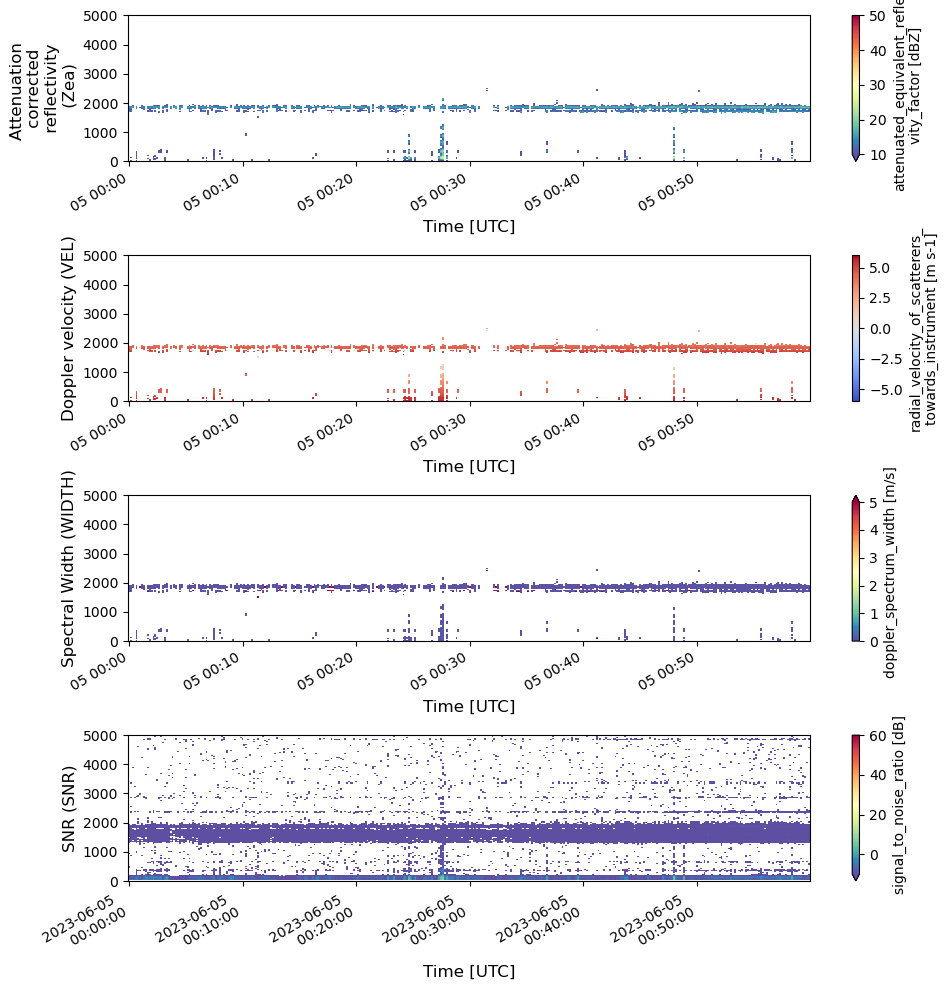

In [50]:
fig, ax = plt.subplots(4, 1, figsize=(10, 10))
ds["Zea"].T.plot(cmap='Spectral_r', vmin=10, vmax=50, ax=ax[0])
ax[0].set_xlabel('Time [UTC]', fontsize=12), ax[0].set_ylabel('Attenuation \n corrected \n reflectivity \n (Zea)', fontsize=12)
ax[0].set_ylim(0, 5000)
ds["VEL"].T.plot(cmap='coolwarm', vmin=-6, vmax=6, ax=ax[1])
ax[1].set_xlabel('Time [UTC]', fontsize=12), ax[1].set_ylabel('Doppler velocity (VEL)', fontsize=12)
ax[1].set_ylim(0, 5000)
ds["WIDTH"].T.plot(cmap='Spectral_r', vmin=0, vmax=5, ax=ax[2])
ax[2].set_xlabel('Time [UTC]', fontsize=12), ax[2].set_ylabel('Spectral Width (WIDTH)', fontsize=12)
ax[2].set_ylim(0, 5000)
ds["SNR"].T.plot(cmap='Spectral_r', vmin=-10, vmax=60, ax=ax[3])
ax[3].set_xlabel('Time [UTC]', fontsize=12), ax[3].set_ylabel('SNR (SNR)', fontsize=12)
ax[3].set_ylim(0, 5000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
fig.tight_layout()

In [51]:
ds = xr.open_mfdataset('/Users/adamabdelhak/Downloads/crocus-neiu-mrrpro-a1-20230606.000000.nc')

In [52]:
ds

<xarray.Dataset>
Dimensions:                 (range: 256, sweep: 1, time: 360, n_spectra: 256,
                             spectrum_n_samples: 32)
Coordinates:
  * range                   (range) float32 0.0 35.0 70.0 ... 8.89e+03 8.925e+03
  * time                    (time) datetime64[ns] 2023-06-06T00:00:00.001088 ...
    elevation               (time) float32 dask.array<chunksize=(360,), meta=np.ndarray>
    azimuth                 (time) float32 dask.array<chunksize=(360,), meta=np.ndarray>
Dimensions without coordinates: sweep, n_spectra, spectrum_n_samples
Data variables: (12/31)
    volume_number           int32 ...
    time_coverage_start     |S128 ...
    time_coverage_end       |S128 ...
    time_reference          |S128 ...
    instrument_type         |S128 ...
    transfer_function       (range) float64 dask.array<chunksize=(256,), meta=np.ndarray>
    ...                      ...
    ML                      (time, range) float64 dask.array<chunksize=(360, 256), meta=np.ndarray>
    SNR                     (time, range) float32 dask.array<chunksize=(360, 256), meta=np.ndarray>
    index_spectra           (time, range) float64 dask.array<chunksize=(360, 256), meta=np.ndarray>
    spectrum_raw            (time, n_spectra, spectrum_n_samples) float64 dask.array<chunksize=(360, 256, 32), meta=np.ndarray>
    N                       (time, n_spectra, spectrum_n_samples) float64 dask.array<chunksize=(360, 256, 32), meta=np.ndarray>
    D                       (n_spectra, spectrum_n_samples) float64 dask.array<chunksize=(256, 32), meta=np.ndarray>
Attributes:
    Conventions:      CF/Radial
    version:          1.3
    title:            METEK MRR Pro 1.2.5 Data
    institution:      
    references:       
    source:           
    history:          
    comment:          
    instrument_name:  METEK MRR Pro 1.2.5, ID: MRRPro97, METEK Serial Number:...
    site_name:        cms-mrr-002
    field_names:      Za,Z,Zea,Ze,RR,LWC,PIA,VEL,WIDTH,SNR,spectrum_reflectiv...

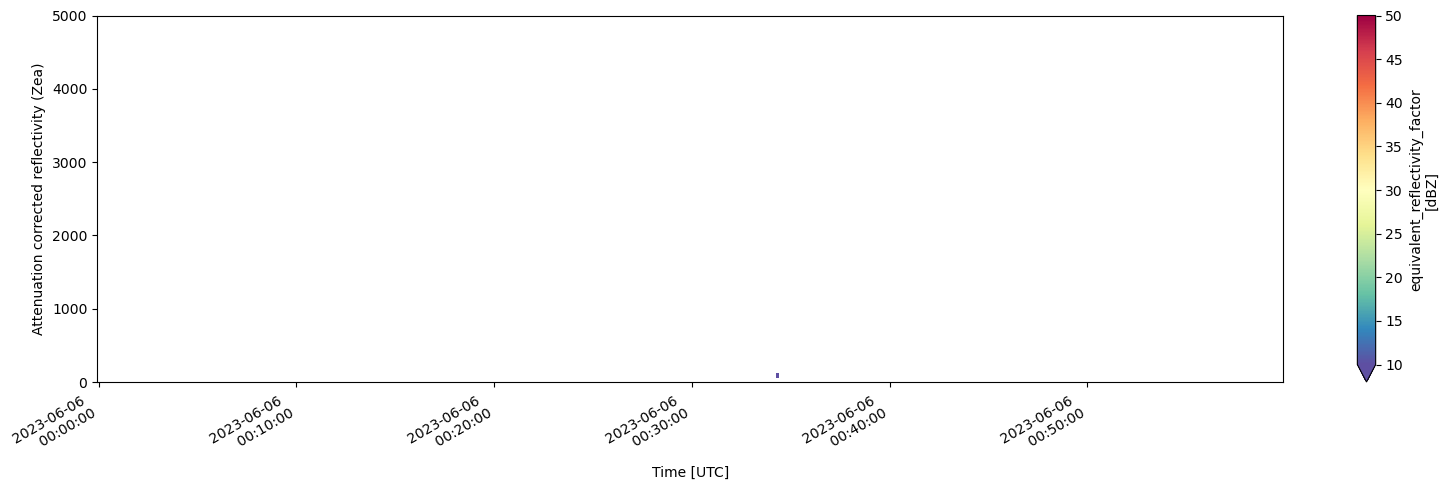

In [53]:
fig = plt.figure(figsize=(16,5))
ds["Ze"].T.plot(cmap='Spectral_r', vmin=10, vmax=50)
plt.xlabel('Time [UTC]'), plt.ylabel('Attenuation corrected reflectivity (Zea)')
plt.ylim(0, 5000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
plt.tight_layout()
plt.savefig("June_6_mrr.png",dpi=500)

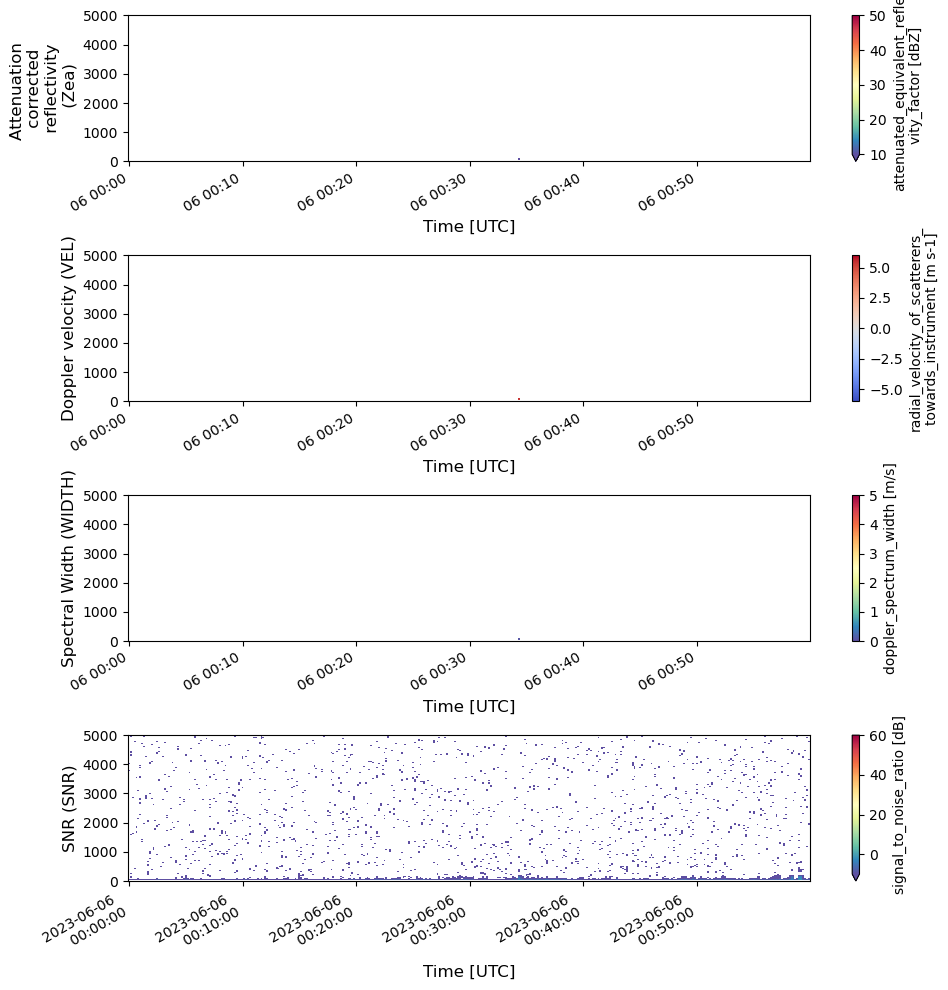

In [54]:
fig, ax = plt.subplots(4, 1, figsize=(10, 10))
ds["Zea"].T.plot(cmap='Spectral_r', vmin=10, vmax=50, ax=ax[0])
ax[0].set_xlabel('Time [UTC]', fontsize=12), ax[0].set_ylabel('Attenuation \n corrected \n reflectivity \n (Zea)', fontsize=12)
ax[0].set_ylim(0, 5000)
ds["VEL"].T.plot(cmap='coolwarm', vmin=-6, vmax=6, ax=ax[1])
ax[1].set_xlabel('Time [UTC]', fontsize=12), ax[1].set_ylabel('Doppler velocity (VEL)', fontsize=12)
ax[1].set_ylim(0, 5000)
ds["WIDTH"].T.plot(cmap='Spectral_r', vmin=0, vmax=5, ax=ax[2])
ax[2].set_xlabel('Time [UTC]', fontsize=12), ax[2].set_ylabel('Spectral Width (WIDTH)', fontsize=12)
ax[2].set_ylim(0, 5000)
ds["SNR"].T.plot(cmap='Spectral_r', vmin=-10, vmax=60, ax=ax[3])
ax[3].set_xlabel('Time [UTC]', fontsize=12), ax[3].set_ylabel('SNR (SNR)', fontsize=12)
ax[3].set_ylim(0, 5000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
fig.tight_layout()

In [55]:
ds = xr.open_mfdataset('/Users/adamabdelhak/Downloads/crocus-neiu-mrrpro-a1-20230607.000000.nc')

In [56]:
ds

<xarray.Dataset>
Dimensions:                 (range: 256, sweep: 1, time: 360, n_spectra: 256,
                             spectrum_n_samples: 32)
Coordinates:
  * range                   (range) float32 0.0 35.0 70.0 ... 8.89e+03 8.925e+03
  * time                    (time) datetime64[ns] 2023-06-07T00:00:00.0010828...
    elevation               (time) float32 dask.array<chunksize=(360,), meta=np.ndarray>
    azimuth                 (time) float32 dask.array<chunksize=(360,), meta=np.ndarray>
Dimensions without coordinates: sweep, n_spectra, spectrum_n_samples
Data variables: (12/31)
    volume_number           int32 ...
    time_coverage_start     |S128 ...
    time_coverage_end       |S128 ...
    time_reference          |S128 ...
    instrument_type         |S128 ...
    transfer_function       (range) float64 dask.array<chunksize=(256,), meta=np.ndarray>
    ...                      ...
    ML                      (time, range) float64 dask.array<chunksize=(360, 256), meta=np.ndarray>
    SNR                     (time, range) float32 dask.array<chunksize=(360, 256), meta=np.ndarray>
    index_spectra           (time, range) float64 dask.array<chunksize=(360, 256), meta=np.ndarray>
    spectrum_raw            (time, n_spectra, spectrum_n_samples) float64 dask.array<chunksize=(360, 256, 32), meta=np.ndarray>
    N                       (time, n_spectra, spectrum_n_samples) float64 dask.array<chunksize=(360, 256, 32), meta=np.ndarray>
    D                       (n_spectra, spectrum_n_samples) float64 dask.array<chunksize=(256, 32), meta=np.ndarray>
Attributes:
    Conventions:      CF/Radial
    version:          1.3
    title:            METEK MRR Pro 1.2.5 Data
    institution:      
    references:       
    source:           
    history:          
    comment:          
    instrument_name:  METEK MRR Pro 1.2.5, ID: MRRPro97, METEK Serial Number:...
    site_name:        cms-mrr-002
    field_names:      Za,Z,Zea,Ze,RR,LWC,PIA,VEL,WIDTH,SNR,spectrum_reflectiv...

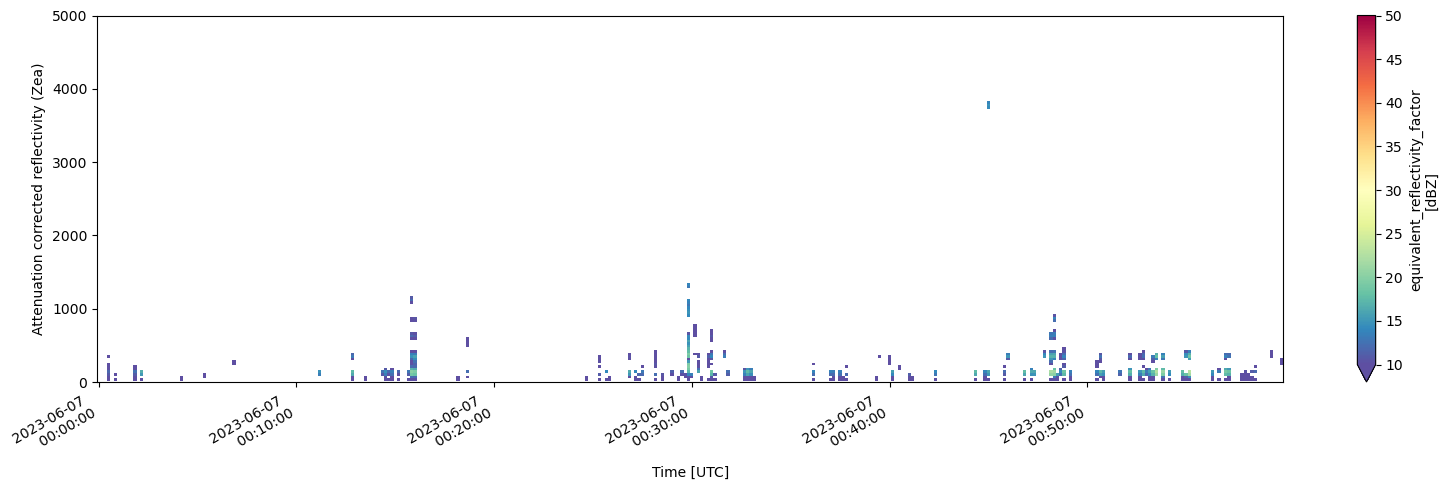

In [57]:
fig = plt.figure(figsize=(16,5))
ds["Ze"].T.plot(cmap='Spectral_r', vmin=10, vmax=50)
plt.xlabel('Time [UTC]'), plt.ylabel('Attenuation corrected reflectivity (Zea)')
plt.ylim(0, 5000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
plt.tight_layout()
plt.savefig("June_7_mrr.png",dpi=500)

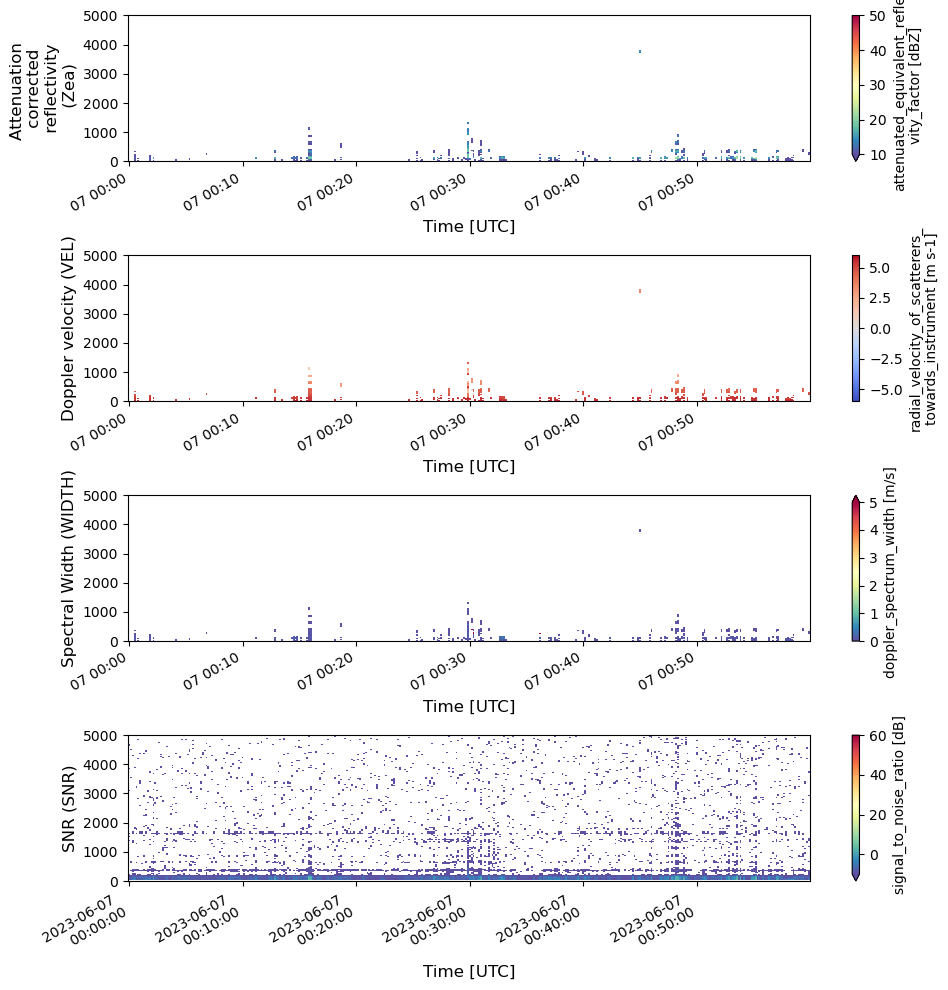

In [58]:
fig, ax = plt.subplots(4, 1, figsize=(10, 10))
ds["Zea"].T.plot(cmap='Spectral_r', vmin=10, vmax=50, ax=ax[0])
ax[0].set_xlabel('Time [UTC]', fontsize=12), ax[0].set_ylabel('Attenuation \n corrected \n reflectivity \n (Zea)', fontsize=12)
ax[0].set_ylim(0, 5000)
ds["VEL"].T.plot(cmap='coolwarm', vmin=-6, vmax=6, ax=ax[1])
ax[1].set_xlabel('Time [UTC]', fontsize=12), ax[1].set_ylabel('Doppler velocity (VEL)', fontsize=12)
ax[1].set_ylim(0, 5000)
ds["WIDTH"].T.plot(cmap='Spectral_r', vmin=0, vmax=5, ax=ax[2])
ax[2].set_xlabel('Time [UTC]', fontsize=12), ax[2].set_ylabel('Spectral Width (WIDTH)', fontsize=12)
ax[2].set_ylim(0, 5000)
ds["SNR"].T.plot(cmap='Spectral_r', vmin=-10, vmax=60, ax=ax[3])
ax[3].set_xlabel('Time [UTC]', fontsize=12), ax[3].set_ylabel('SNR (SNR)', fontsize=12)
ax[3].set_ylim(0, 5000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
fig.tight_layout()

In [67]:
ds = xr.open_mfdataset('/Users/adamabdelhak/Downloads/crocus-neiu-mrrpro-a1-20230608.000000.nc')

In [68]:
ds

<xarray.Dataset>
Dimensions:                 (range: 256, sweep: 1, time: 360, n_spectra: 256,
                             spectrum_n_samples: 32)
Coordinates:
  * range                   (range) float32 0.0 35.0 70.0 ... 8.89e+03 8.925e+03
  * time                    (time) datetime64[ns] 2023-06-08T00:00:00.0010711...
    elevation               (time) float32 dask.array<chunksize=(360,), meta=np.ndarray>
    azimuth                 (time) float32 dask.array<chunksize=(360,), meta=np.ndarray>
Dimensions without coordinates: sweep, n_spectra, spectrum_n_samples
Data variables: (12/31)
    volume_number           int32 ...
    time_coverage_start     |S128 ...
    time_coverage_end       |S128 ...
    time_reference          |S128 ...
    instrument_type         |S128 ...
    transfer_function       (range) float64 dask.array<chunksize=(256,), meta=np.ndarray>
    ...                      ...
    ML                      (time, range) float64 dask.array<chunksize=(360, 256), meta=np.ndarray>
    SNR                     (time, range) float32 dask.array<chunksize=(360, 256), meta=np.ndarray>
    index_spectra           (time, range) float64 dask.array<chunksize=(360, 256), meta=np.ndarray>
    spectrum_raw            (time, n_spectra, spectrum_n_samples) float64 dask.array<chunksize=(360, 256, 32), meta=np.ndarray>
    N                       (time, n_spectra, spectrum_n_samples) float64 dask.array<chunksize=(360, 256, 32), meta=np.ndarray>
    D                       (n_spectra, spectrum_n_samples) float64 dask.array<chunksize=(256, 32), meta=np.ndarray>
Attributes:
    Conventions:      CF/Radial
    version:          1.3
    title:            METEK MRR Pro 1.2.5 Data
    institution:      
    references:       
    source:           
    history:          
    comment:          
    instrument_name:  METEK MRR Pro 1.2.5, ID: MRRPro97, METEK Serial Number:...
    site_name:        cms-mrr-002
    field_names:      Za,Z,Zea,Ze,RR,LWC,PIA,VEL,WIDTH,SNR,spectrum_reflectiv...

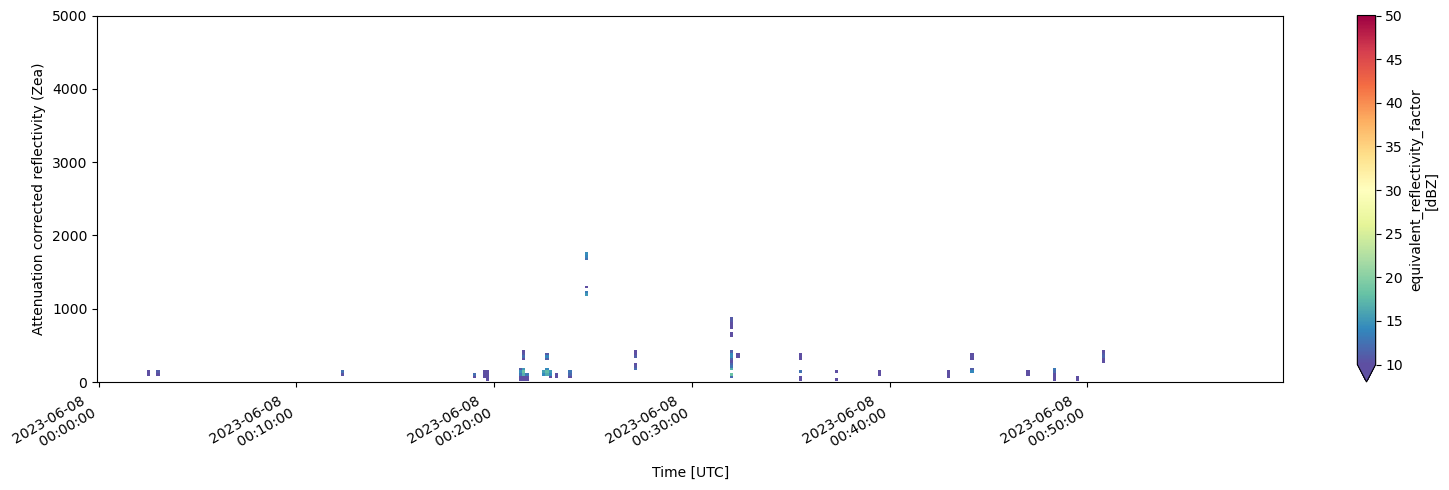

In [69]:
fig = plt.figure(figsize=(16,5))
ds["Ze"].T.plot(cmap='Spectral_r', vmin=10, vmax=50)
plt.xlabel('Time [UTC]'), plt.ylabel('Attenuation corrected reflectivity (Zea)')
plt.ylim(0, 5000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
plt.tight_layout()
plt.savefig("June_8_mrr.png",dpi=500)

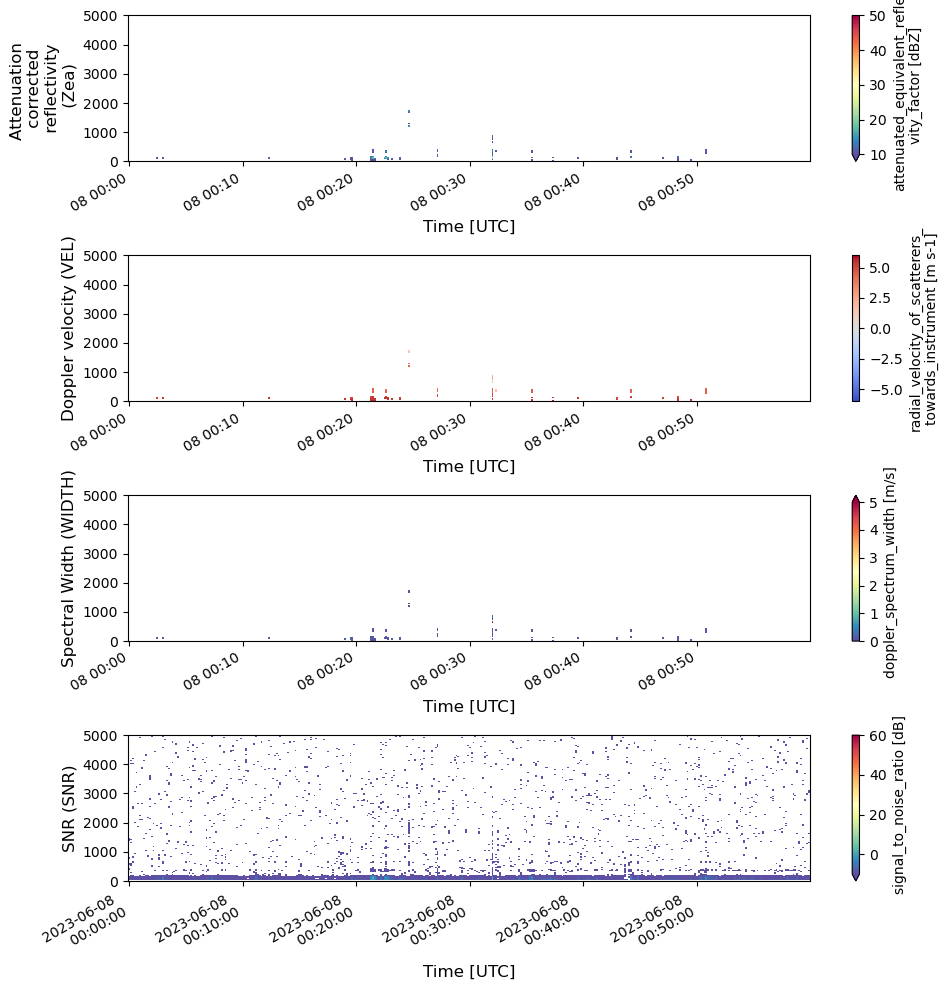

In [70]:
fig, ax = plt.subplots(4, 1, figsize=(10, 10))
ds["Zea"].T.plot(cmap='Spectral_r', vmin=10, vmax=50, ax=ax[0])
ax[0].set_xlabel('Time [UTC]', fontsize=12), ax[0].set_ylabel('Attenuation \n corrected \n reflectivity \n (Zea)', fontsize=12)
ax[0].set_ylim(0, 5000)
ds["VEL"].T.plot(cmap='coolwarm', vmin=-6, vmax=6, ax=ax[1])
ax[1].set_xlabel('Time [UTC]', fontsize=12), ax[1].set_ylabel('Doppler velocity (VEL)', fontsize=12)
ax[1].set_ylim(0, 5000)
ds["WIDTH"].T.plot(cmap='Spectral_r', vmin=0, vmax=5, ax=ax[2])
ax[2].set_xlabel('Time [UTC]', fontsize=12), ax[2].set_ylabel('Spectral Width (WIDTH)', fontsize=12)
ax[2].set_ylim(0, 5000)
ds["SNR"].T.plot(cmap='Spectral_r', vmin=-10, vmax=60, ax=ax[3])
ax[3].set_xlabel('Time [UTC]', fontsize=12), ax[3].set_ylabel('SNR (SNR)', fontsize=12)
ax[3].set_ylim(0, 5000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
fig.tight_layout()

In [71]:
ds = xr.open_mfdataset('/Users/adamabdelhak/Downloads/crocus-neiu-mrrpro-a1-20230609.000000.nc')

In [72]:
ds

<xarray.Dataset>
Dimensions:                 (range: 256, sweep: 1, time: 360, n_spectra: 256,
                             spectrum_n_samples: 32)
Coordinates:
  * range                   (range) float32 0.0 35.0 70.0 ... 8.89e+03 8.925e+03
  * time                    (time) datetime64[ns] 2023-06-09T00:00:00.0010841...
    elevation               (time) float32 dask.array<chunksize=(360,), meta=np.ndarray>
    azimuth                 (time) float32 dask.array<chunksize=(360,), meta=np.ndarray>
Dimensions without coordinates: sweep, n_spectra, spectrum_n_samples
Data variables: (12/31)
    volume_number           int32 ...
    time_coverage_start     |S128 ...
    time_coverage_end       |S128 ...
    time_reference          |S128 ...
    instrument_type         |S128 ...
    transfer_function       (range) float64 dask.array<chunksize=(256,), meta=np.ndarray>
    ...                      ...
    ML                      (time, range) float64 dask.array<chunksize=(360, 256), meta=np.ndarray>
    SNR                     (time, range) float32 dask.array<chunksize=(360, 256), meta=np.ndarray>
    index_spectra           (time, range) float64 dask.array<chunksize=(360, 256), meta=np.ndarray>
    spectrum_raw            (time, n_spectra, spectrum_n_samples) float64 dask.array<chunksize=(360, 256, 32), meta=np.ndarray>
    N                       (time, n_spectra, spectrum_n_samples) float64 dask.array<chunksize=(360, 256, 32), meta=np.ndarray>
    D                       (n_spectra, spectrum_n_samples) float64 dask.array<chunksize=(256, 32), meta=np.ndarray>
Attributes:
    Conventions:      CF/Radial
    version:          1.3
    title:            METEK MRR Pro 1.2.5 Data
    institution:      
    references:       
    source:           
    history:          
    comment:          
    instrument_name:  METEK MRR Pro 1.2.5, ID: MRRPro97, METEK Serial Number:...
    site_name:        cms-mrr-002
    field_names:      Za,Z,Zea,Ze,RR,LWC,PIA,VEL,WIDTH,SNR,spectrum_reflectiv...

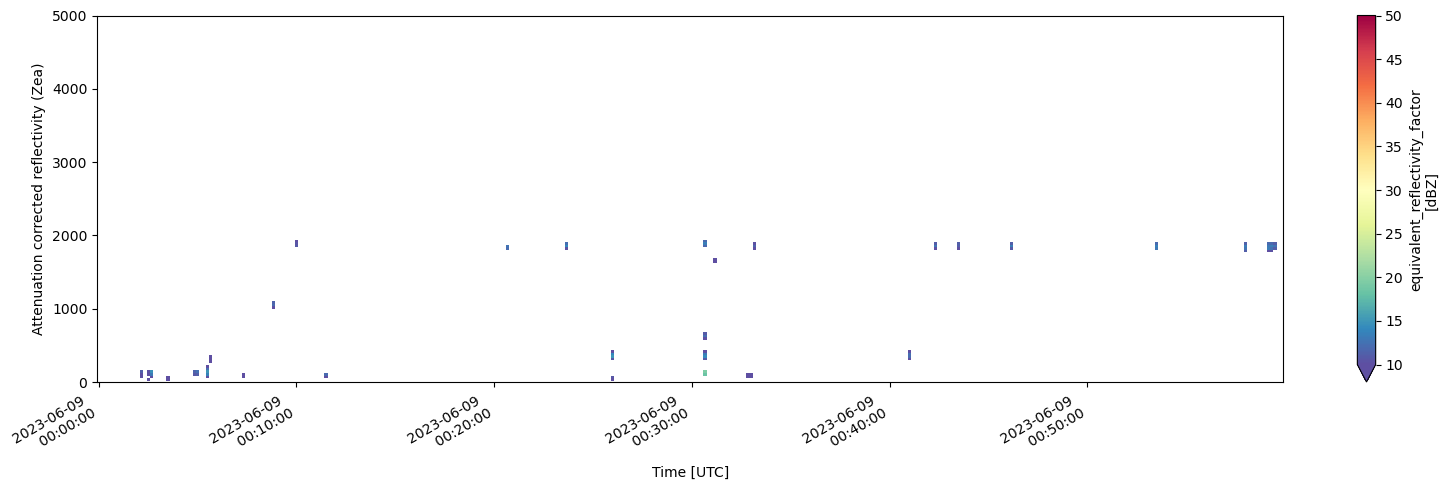

In [73]:
fig = plt.figure(figsize=(16,5))
ds["Ze"].T.plot(cmap='Spectral_r', vmin=10, vmax=50)
plt.xlabel('Time [UTC]'), plt.ylabel('Attenuation corrected reflectivity (Zea)')
plt.ylim(0, 5000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
plt.tight_layout()
plt.savefig("June_9_mrr.png",dpi=500)

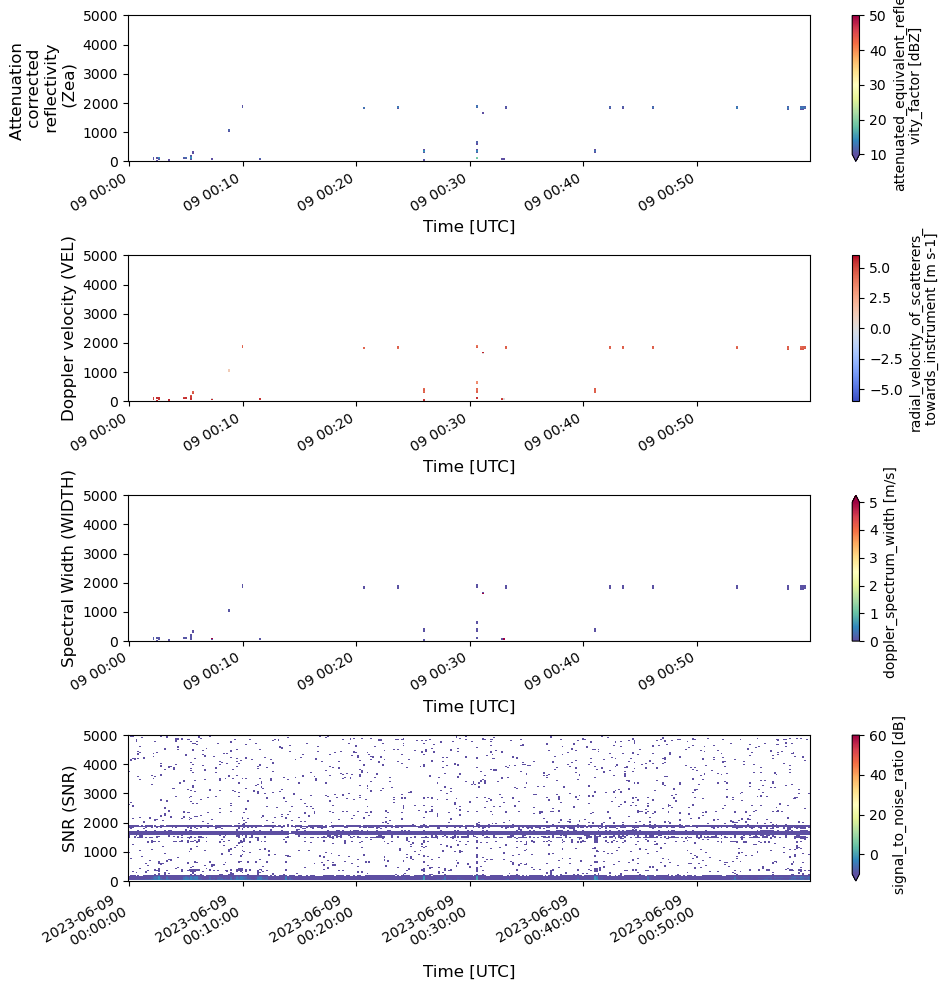

In [74]:
fig, ax = plt.subplots(4, 1, figsize=(10, 10))
ds["Zea"].T.plot(cmap='Spectral_r', vmin=10, vmax=50, ax=ax[0])
ax[0].set_xlabel('Time [UTC]', fontsize=12), ax[0].set_ylabel('Attenuation \n corrected \n reflectivity \n (Zea)', fontsize=12)
ax[0].set_ylim(0, 5000)
ds["VEL"].T.plot(cmap='coolwarm', vmin=-6, vmax=6, ax=ax[1])
ax[1].set_xlabel('Time [UTC]', fontsize=12), ax[1].set_ylabel('Doppler velocity (VEL)', fontsize=12)
ax[1].set_ylim(0, 5000)
ds["WIDTH"].T.plot(cmap='Spectral_r', vmin=0, vmax=5, ax=ax[2])
ax[2].set_xlabel('Time [UTC]', fontsize=12), ax[2].set_ylabel('Spectral Width (WIDTH)', fontsize=12)
ax[2].set_ylim(0, 5000)
ds["SNR"].T.plot(cmap='Spectral_r', vmin=-10, vmax=60, ax=ax[3])
ax[3].set_xlabel('Time [UTC]', fontsize=12), ax[3].set_ylabel('SNR (SNR)', fontsize=12)
ax[3].set_ylim(0, 5000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
fig.tight_layout()

In [75]:
ds = xr.open_mfdataset('/Users/adamabdelhak/Downloads/crocus-neiu-mrrpro-a1-20230610.000000.nc')

In [76]:
ds

<xarray.Dataset>
Dimensions:                 (range: 256, sweep: 1, time: 360, n_spectra: 256,
                             spectrum_n_samples: 32)
Coordinates:
  * range                   (range) float32 0.0 35.0 70.0 ... 8.89e+03 8.925e+03
  * time                    (time) datetime64[ns] 2023-06-10T00:00:00.0010828...
    elevation               (time) float32 dask.array<chunksize=(360,), meta=np.ndarray>
    azimuth                 (time) float32 dask.array<chunksize=(360,), meta=np.ndarray>
Dimensions without coordinates: sweep, n_spectra, spectrum_n_samples
Data variables: (12/31)
    volume_number           int32 ...
    time_coverage_start     |S128 ...
    time_coverage_end       |S128 ...
    time_reference          |S128 ...
    instrument_type         |S128 ...
    transfer_function       (range) float64 dask.array<chunksize=(256,), meta=np.ndarray>
    ...                      ...
    ML                      (time, range) float64 dask.array<chunksize=(360, 256), meta=np.ndarray>
    SNR                     (time, range) float32 dask.array<chunksize=(360, 256), meta=np.ndarray>
    index_spectra           (time, range) float64 dask.array<chunksize=(360, 256), meta=np.ndarray>
    spectrum_raw            (time, n_spectra, spectrum_n_samples) float64 dask.array<chunksize=(360, 256, 32), meta=np.ndarray>
    N                       (time, n_spectra, spectrum_n_samples) float64 dask.array<chunksize=(360, 256, 32), meta=np.ndarray>
    D                       (n_spectra, spectrum_n_samples) float64 dask.array<chunksize=(256, 32), meta=np.ndarray>
Attributes:
    Conventions:      CF/Radial
    version:          1.3
    title:            METEK MRR Pro 1.2.5 Data
    institution:      
    references:       
    source:           
    history:          
    comment:          
    instrument_name:  METEK MRR Pro 1.2.5, ID: MRRPro97, METEK Serial Number:...
    site_name:        cms-mrr-002
    field_names:      Za,Z,Zea,Ze,RR,LWC,PIA,VEL,WIDTH,SNR,spectrum_reflectiv...

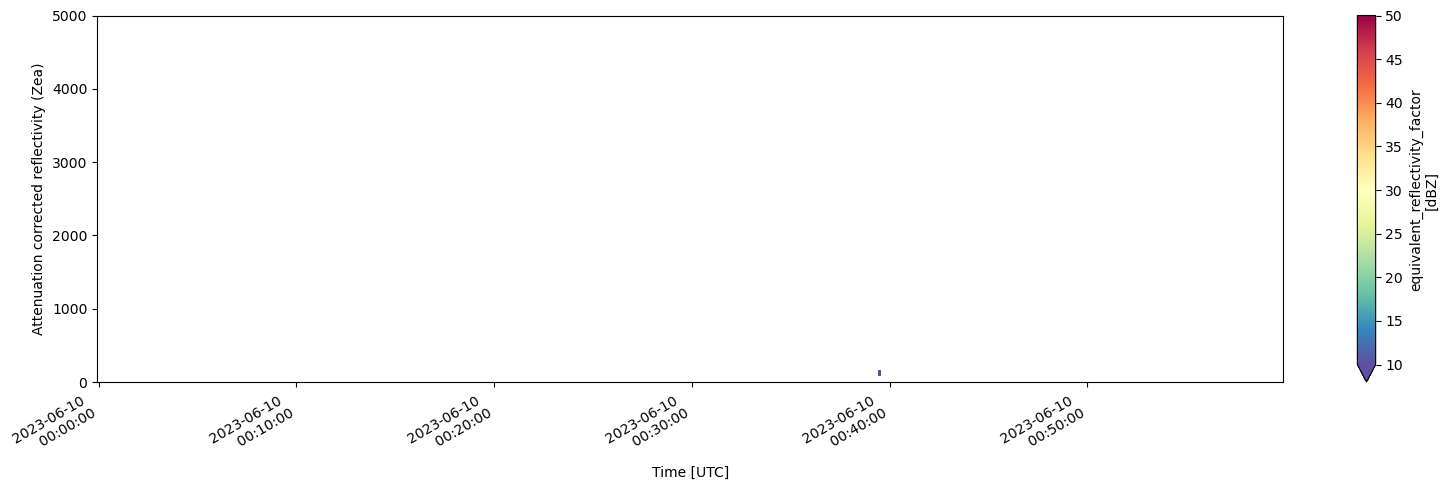

In [77]:
fig = plt.figure(figsize=(16,5))
ds["Ze"].T.plot(cmap='Spectral_r', vmin=10, vmax=50)
plt.xlabel('Time [UTC]'), plt.ylabel('Attenuation corrected reflectivity (Zea)')
plt.ylim(0, 5000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
plt.tight_layout()
plt.savefig("June_10_mrr.png",dpi=500)

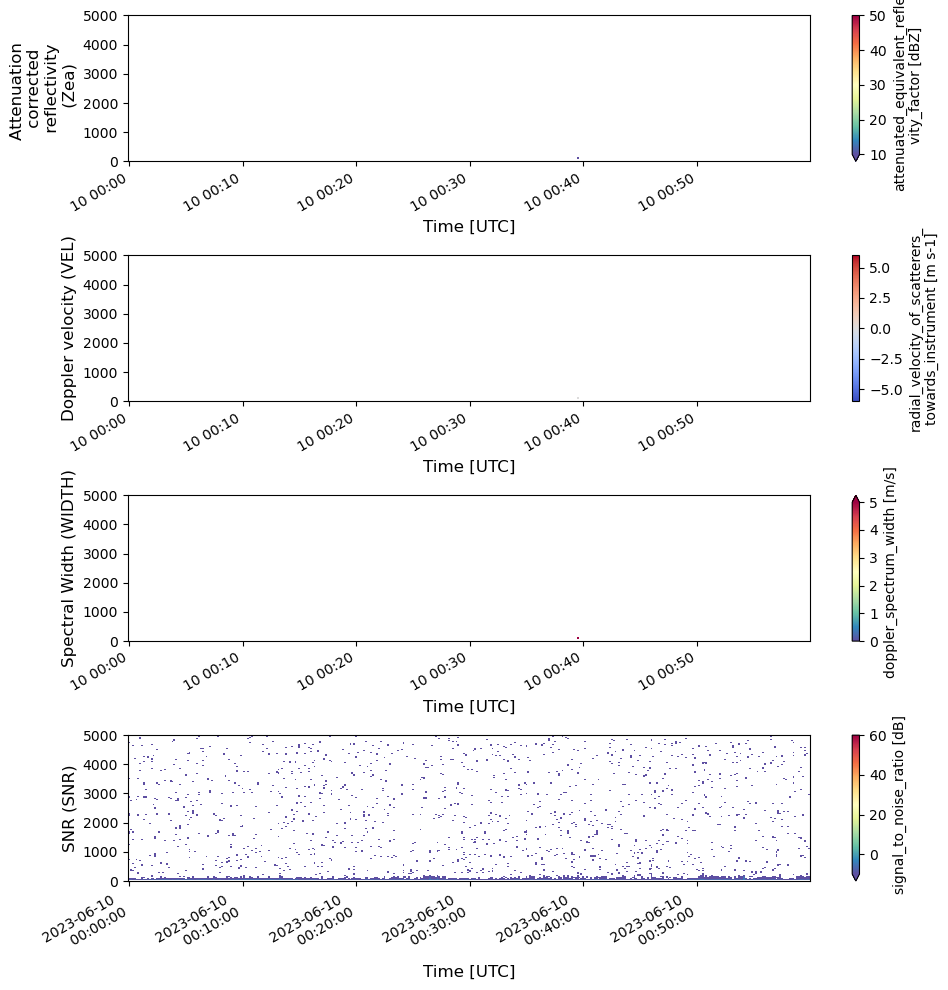

In [78]:
fig, ax = plt.subplots(4, 1, figsize=(10, 10))
ds["Zea"].T.plot(cmap='Spectral_r', vmin=10, vmax=50, ax=ax[0])
ax[0].set_xlabel('Time [UTC]', fontsize=12), ax[0].set_ylabel('Attenuation \n corrected \n reflectivity \n (Zea)', fontsize=12)
ax[0].set_ylim(0, 5000)
ds["VEL"].T.plot(cmap='coolwarm', vmin=-6, vmax=6, ax=ax[1])
ax[1].set_xlabel('Time [UTC]', fontsize=12), ax[1].set_ylabel('Doppler velocity (VEL)', fontsize=12)
ax[1].set_ylim(0, 5000)
ds["WIDTH"].T.plot(cmap='Spectral_r', vmin=0, vmax=5, ax=ax[2])
ax[2].set_xlabel('Time [UTC]', fontsize=12), ax[2].set_ylabel('Spectral Width (WIDTH)', fontsize=12)
ax[2].set_ylim(0, 5000)
ds["SNR"].T.plot(cmap='Spectral_r', vmin=-10, vmax=60, ax=ax[3])
ax[3].set_xlabel('Time [UTC]', fontsize=12), ax[3].set_ylabel('SNR (SNR)', fontsize=12)
ax[3].set_ylim(0, 5000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
fig.tight_layout()

In [79]:
ds = xr.open_mfdataset('/Users/adamabdelhak/Downloads/crocus-neiu-mrrpro-a1-20230611.000000.nc')

In [80]:
ds

<xarray.Dataset>
Dimensions:                 (range: 256, sweep: 1, time: 360, n_spectra: 256,
                             spectrum_n_samples: 32)
Coordinates:
  * range                   (range) float32 0.0 35.0 70.0 ... 8.89e+03 8.925e+03
  * time                    (time) datetime64[ns] 2023-06-11T00:00:00.0010780...
    elevation               (time) float32 dask.array<chunksize=(360,), meta=np.ndarray>
    azimuth                 (time) float32 dask.array<chunksize=(360,), meta=np.ndarray>
Dimensions without coordinates: sweep, n_spectra, spectrum_n_samples
Data variables: (12/31)
    volume_number           int32 ...
    time_coverage_start     |S128 ...
    time_coverage_end       |S128 ...
    time_reference          |S128 ...
    instrument_type         |S128 ...
    transfer_function       (range) float64 dask.array<chunksize=(256,), meta=np.ndarray>
    ...                      ...
    ML                      (time, range) float64 dask.array<chunksize=(360, 256), meta=np.ndarray>
    SNR                     (time, range) float32 dask.array<chunksize=(360, 256), meta=np.ndarray>
    index_spectra           (time, range) float64 dask.array<chunksize=(360, 256), meta=np.ndarray>
    spectrum_raw            (time, n_spectra, spectrum_n_samples) float64 dask.array<chunksize=(360, 256, 32), meta=np.ndarray>
    N                       (time, n_spectra, spectrum_n_samples) float64 dask.array<chunksize=(360, 256, 32), meta=np.ndarray>
    D                       (n_spectra, spectrum_n_samples) float64 dask.array<chunksize=(256, 32), meta=np.ndarray>
Attributes:
    Conventions:      CF/Radial
    version:          1.3
    title:            METEK MRR Pro 1.2.5 Data
    institution:      
    references:       
    source:           
    history:          
    comment:          
    instrument_name:  METEK MRR Pro 1.2.5, ID: MRRPro97, METEK Serial Number:...
    site_name:        cms-mrr-002
    field_names:      Za,Z,Zea,Ze,RR,LWC,PIA,VEL,WIDTH,SNR,spectrum_reflectiv...

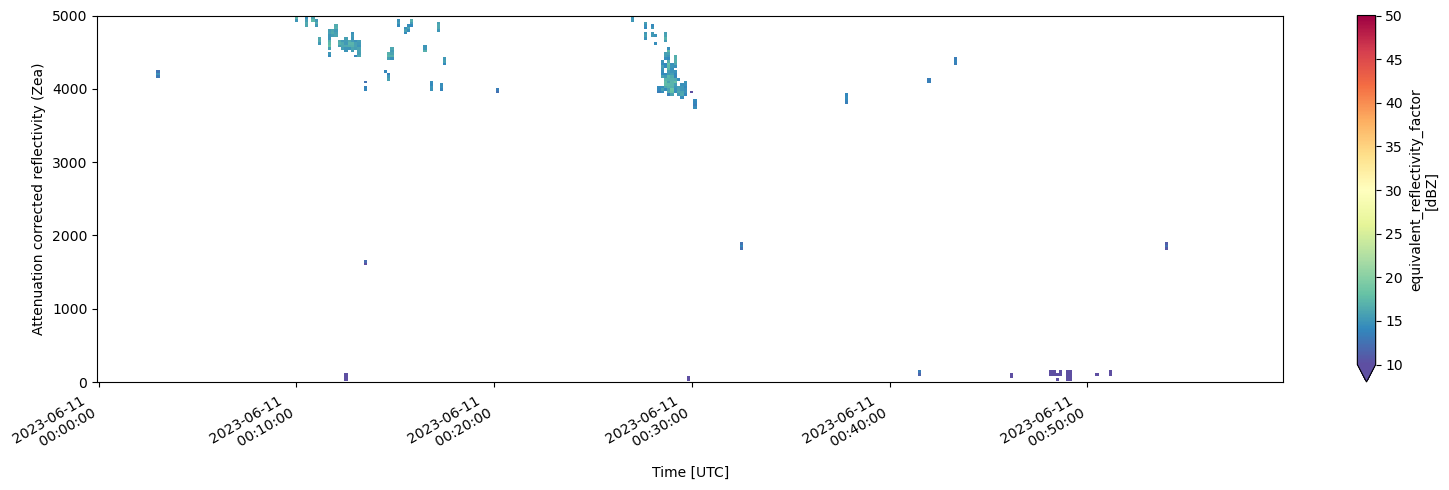

In [81]:
fig = plt.figure(figsize=(16,5))
ds["Ze"].T.plot(cmap='Spectral_r', vmin=10, vmax=50)
plt.xlabel('Time [UTC]'), plt.ylabel('Attenuation corrected reflectivity (Zea)')
plt.ylim(0, 5000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
plt.tight_layout()
plt.savefig("June_11_mrr.png",dpi=500)

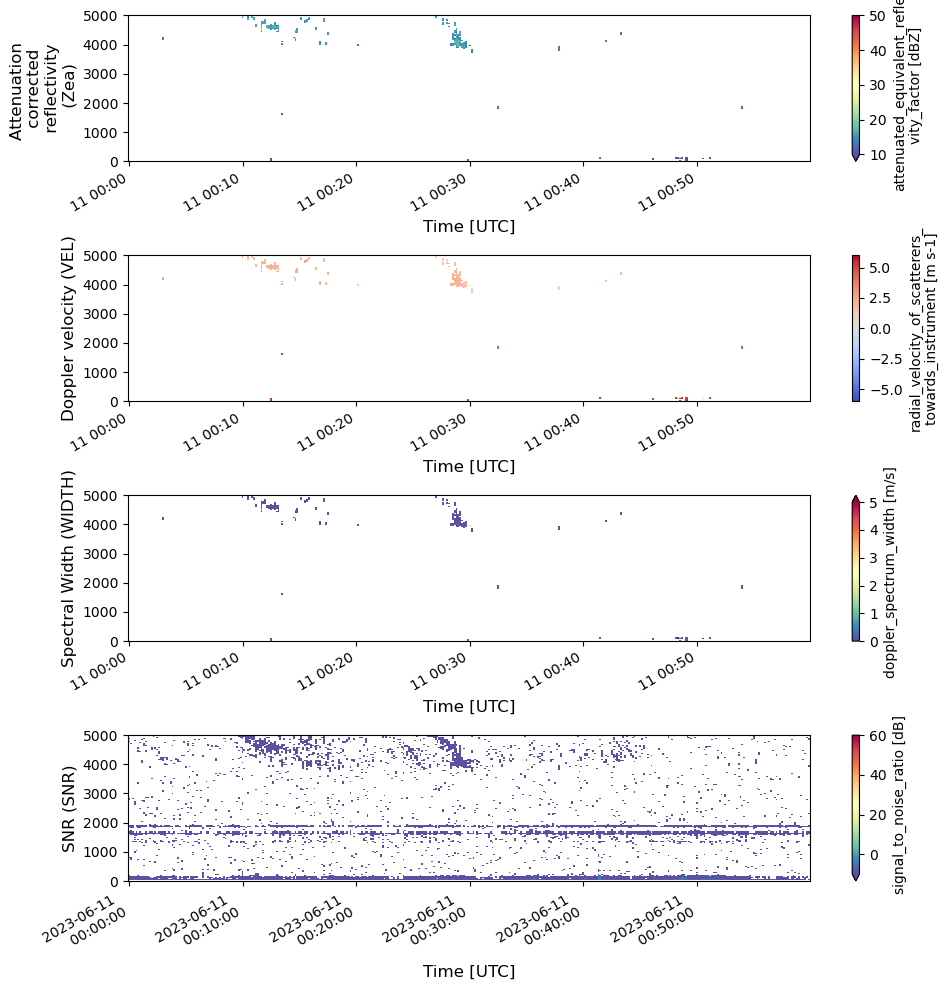

In [82]:
fig, ax = plt.subplots(4, 1, figsize=(10, 10))
ds["Zea"].T.plot(cmap='Spectral_r', vmin=10, vmax=50, ax=ax[0])
ax[0].set_xlabel('Time [UTC]', fontsize=12), ax[0].set_ylabel('Attenuation \n corrected \n reflectivity \n (Zea)', fontsize=12)
ax[0].set_ylim(0, 5000)
ds["VEL"].T.plot(cmap='coolwarm', vmin=-6, vmax=6, ax=ax[1])
ax[1].set_xlabel('Time [UTC]', fontsize=12), ax[1].set_ylabel('Doppler velocity (VEL)', fontsize=12)
ax[1].set_ylim(0, 5000)
ds["WIDTH"].T.plot(cmap='Spectral_r', vmin=0, vmax=5, ax=ax[2])
ax[2].set_xlabel('Time [UTC]', fontsize=12), ax[2].set_ylabel('Spectral Width (WIDTH)', fontsize=12)
ax[2].set_ylim(0, 5000)
ds["SNR"].T.plot(cmap='Spectral_r', vmin=-10, vmax=60, ax=ax[3])
ax[3].set_xlabel('Time [UTC]', fontsize=12), ax[3].set_ylabel('SNR (SNR)', fontsize=12)
ax[3].set_ylim(0, 5000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
fig.tight_layout()

In [59]:
ds = xr.open_mfdataset('/Users/adamabdelhak/Desktop/MRR_June_12/00/2023/June-12/crocus-neiu-mrrpro-a1-20230612.000000.nc')

In [60]:
ds

<xarray.Dataset>
Dimensions:                 (range: 256, sweep: 1, time: 360, n_spectra: 256,
                             spectrum_n_samples: 32)
Coordinates:
  * range                   (range) float32 0.0 35.0 70.0 ... 8.89e+03 8.925e+03
  * time                    (time) datetime64[ns] 2023-06-12T00:00:00.0010890...
    elevation               (time) float32 dask.array<chunksize=(360,), meta=np.ndarray>
    azimuth                 (time) float32 dask.array<chunksize=(360,), meta=np.ndarray>
Dimensions without coordinates: sweep, n_spectra, spectrum_n_samples
Data variables: (12/31)
    volume_number           int32 ...
    time_coverage_start     |S128 ...
    time_coverage_end       |S128 ...
    time_reference          |S128 ...
    instrument_type         |S128 ...
    transfer_function       (range) float64 dask.array<chunksize=(256,), meta=np.ndarray>
    ...                      ...
    ML                      (time, range) float64 dask.array<chunksize=(360, 256), meta=np.ndarray>
    SNR                     (time, range) float32 dask.array<chunksize=(360, 256), meta=np.ndarray>
    index_spectra           (time, range) float64 dask.array<chunksize=(360, 256), meta=np.ndarray>
    spectrum_raw            (time, n_spectra, spectrum_n_samples) float64 dask.array<chunksize=(360, 256, 32), meta=np.ndarray>
    N                       (time, n_spectra, spectrum_n_samples) float64 dask.array<chunksize=(360, 256, 32), meta=np.ndarray>
    D                       (n_spectra, spectrum_n_samples) float64 dask.array<chunksize=(256, 32), meta=np.ndarray>
Attributes:
    Conventions:      CF/Radial
    version:          1.3
    title:            METEK MRR Pro 1.2.5 Data
    institution:      
    references:       
    source:           
    history:          
    comment:          
    instrument_name:  METEK MRR Pro 1.2.5, ID: MRRPro97, METEK Serial Number:...
    site_name:        cms-mrr-002
    field_names:      Za,Z,Zea,Ze,RR,LWC,PIA,VEL,WIDTH,SNR,spectrum_reflectiv...

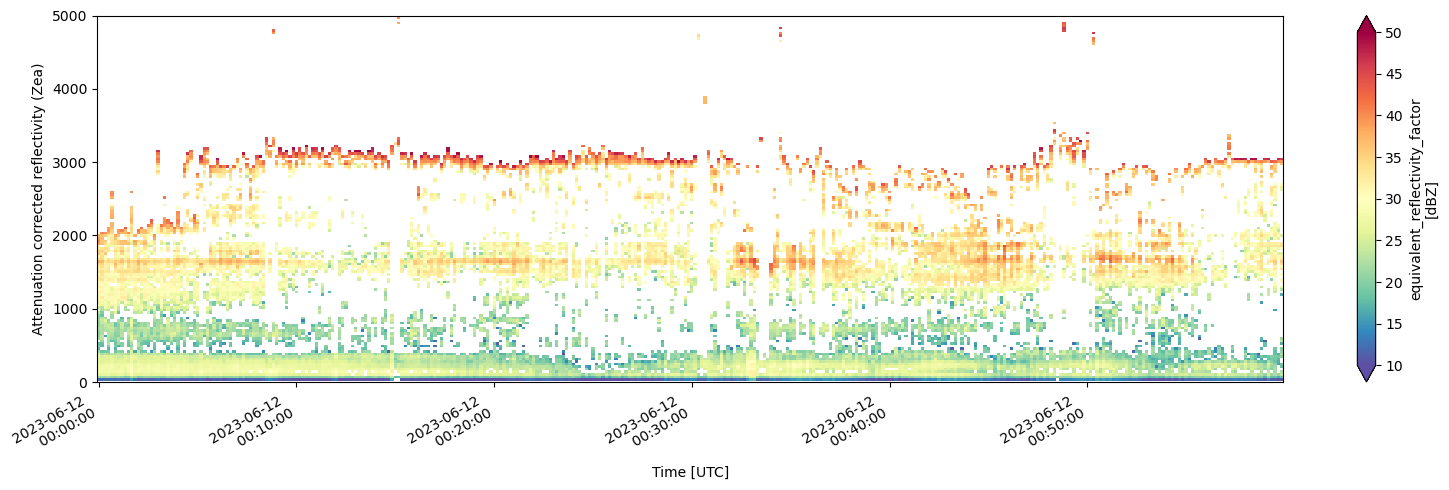

In [61]:
fig = plt.figure(figsize=(16,5))
ds["Ze"].T.plot(cmap='Spectral_r', vmin=10, vmax=50)
plt.xlabel('Time [UTC]'), plt.ylabel('Attenuation corrected reflectivity (Zea)')
plt.ylim(0, 5000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
plt.tight_layout()
plt.savefig("June_12_mrr.png",dpi=500)

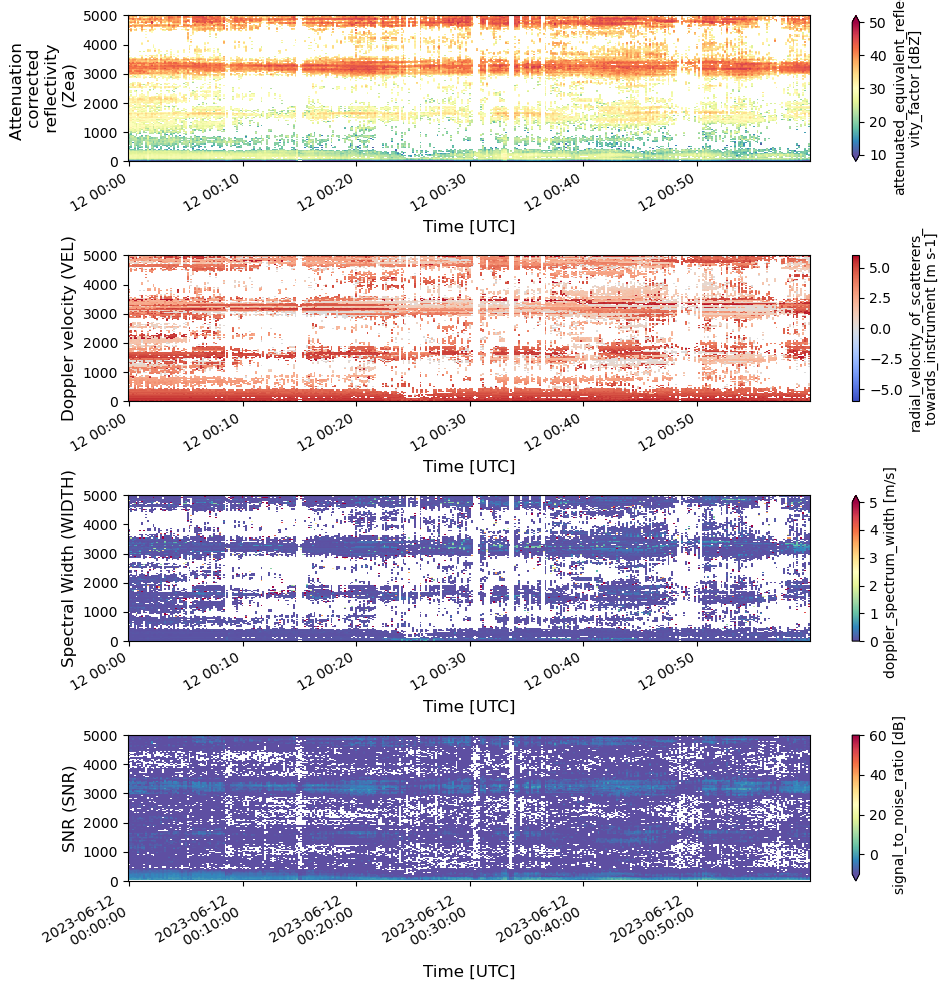

In [62]:
fig, ax = plt.subplots(4, 1, figsize=(10, 10))
ds["Zea"].T.plot(cmap='Spectral_r', vmin=10, vmax=50, ax=ax[0])
ax[0].set_xlabel('Time [UTC]', fontsize=12), ax[0].set_ylabel('Attenuation \n corrected \n reflectivity \n (Zea)', fontsize=12)
ax[0].set_ylim(0, 5000)
ds["VEL"].T.plot(cmap='coolwarm', vmin=-6, vmax=6, ax=ax[1])
ax[1].set_xlabel('Time [UTC]', fontsize=12), ax[1].set_ylabel('Doppler velocity (VEL)', fontsize=12)
ax[1].set_ylim(0, 5000)
ds["WIDTH"].T.plot(cmap='Spectral_r', vmin=0, vmax=5, ax=ax[2])
ax[2].set_xlabel('Time [UTC]', fontsize=12), ax[2].set_ylabel('Spectral Width (WIDTH)', fontsize=12)
ax[2].set_ylim(0, 5000)
ds["SNR"].T.plot(cmap='Spectral_r', vmin=-10, vmax=60, ax=ax[3])
ax[3].set_xlabel('Time [UTC]', fontsize=12), ax[3].set_ylabel('SNR (SNR)', fontsize=12)
ax[3].set_ylim(0, 5000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
fig.tight_layout()

In [83]:
ds = xr.open_mfdataset('/Users/adamabdelhak/Downloads/crocus-neiu-mrrpro-a1-20230613.000000.nc')

In [84]:
ds

<xarray.Dataset>
Dimensions:                 (range: 256, sweep: 1, time: 360, n_spectra: 256,
                             spectrum_n_samples: 32)
Coordinates:
  * range                   (range) float32 0.0 35.0 70.0 ... 8.89e+03 8.925e+03
  * time                    (time) datetime64[ns] 2023-06-13T00:00:00.0010859...
    elevation               (time) float32 dask.array<chunksize=(360,), meta=np.ndarray>
    azimuth                 (time) float32 dask.array<chunksize=(360,), meta=np.ndarray>
Dimensions without coordinates: sweep, n_spectra, spectrum_n_samples
Data variables: (12/31)
    volume_number           int32 ...
    time_coverage_start     |S128 ...
    time_coverage_end       |S128 ...
    time_reference          |S128 ...
    instrument_type         |S128 ...
    transfer_function       (range) float64 dask.array<chunksize=(256,), meta=np.ndarray>
    ...                      ...
    ML                      (time, range) float64 dask.array<chunksize=(360, 256), meta=np.ndarray>
    SNR                     (time, range) float32 dask.array<chunksize=(360, 256), meta=np.ndarray>
    index_spectra           (time, range) float64 dask.array<chunksize=(360, 256), meta=np.ndarray>
    spectrum_raw            (time, n_spectra, spectrum_n_samples) float64 dask.array<chunksize=(360, 256, 32), meta=np.ndarray>
    N                       (time, n_spectra, spectrum_n_samples) float64 dask.array<chunksize=(360, 256, 32), meta=np.ndarray>
    D                       (n_spectra, spectrum_n_samples) float64 dask.array<chunksize=(256, 32), meta=np.ndarray>
Attributes:
    Conventions:      CF/Radial
    version:          1.3
    title:            METEK MRR Pro 1.2.5 Data
    institution:      
    references:       
    source:           
    history:          
    comment:          
    instrument_name:  METEK MRR Pro 1.2.5, ID: MRRPro97, METEK Serial Number:...
    site_name:        cms-mrr-002
    field_names:      Za,Z,Zea,Ze,RR,LWC,PIA,VEL,WIDTH,SNR,spectrum_reflectiv...

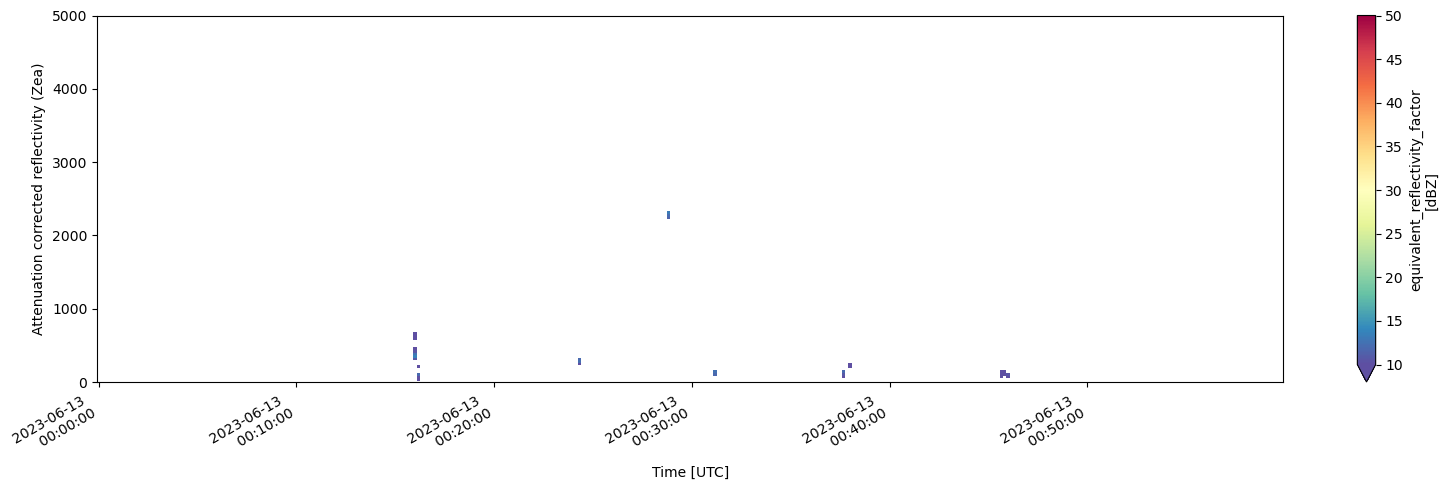

In [85]:
fig = plt.figure(figsize=(16,5))
ds["Ze"].T.plot(cmap='Spectral_r', vmin=10, vmax=50)
plt.xlabel('Time [UTC]'), plt.ylabel('Attenuation corrected reflectivity (Zea)')
plt.ylim(0, 5000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
plt.tight_layout()
plt.savefig("June_13_mrr.png",dpi=500)

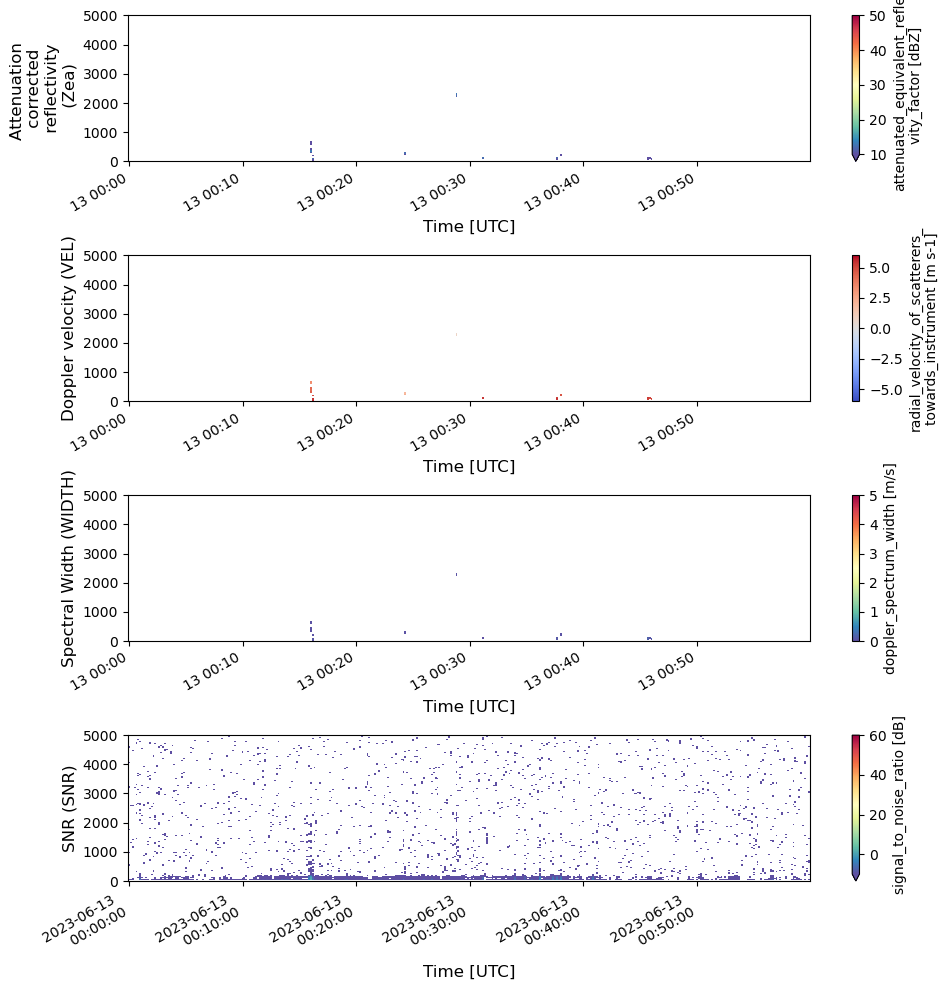

In [86]:
fig, ax = plt.subplots(4, 1, figsize=(10, 10))
ds["Zea"].T.plot(cmap='Spectral_r', vmin=10, vmax=50, ax=ax[0])
ax[0].set_xlabel('Time [UTC]', fontsize=12), ax[0].set_ylabel('Attenuation \n corrected \n reflectivity \n (Zea)', fontsize=12)
ax[0].set_ylim(0, 5000)
ds["VEL"].T.plot(cmap='coolwarm', vmin=-6, vmax=6, ax=ax[1])
ax[1].set_xlabel('Time [UTC]', fontsize=12), ax[1].set_ylabel('Doppler velocity (VEL)', fontsize=12)
ax[1].set_ylim(0, 5000)
ds["WIDTH"].T.plot(cmap='Spectral_r', vmin=0, vmax=5, ax=ax[2])
ax[2].set_xlabel('Time [UTC]', fontsize=12), ax[2].set_ylabel('Spectral Width (WIDTH)', fontsize=12)
ax[2].set_ylim(0, 5000)
ds["SNR"].T.plot(cmap='Spectral_r', vmin=-10, vmax=60, ax=ax[3])
ax[3].set_xlabel('Time [UTC]', fontsize=12), ax[3].set_ylabel('SNR (SNR)', fontsize=12)
ax[3].set_ylim(0, 5000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
fig.tight_layout()

In [87]:
ds = xr.open_mfdataset('/Users/adamabdelhak/Downloads/crocus-neiu-mrrpro-a1-20230614.000000.nc')

In [88]:
ds

<xarray.Dataset>
Dimensions:                 (range: 256, sweep: 1, time: 360, n_spectra: 256,
                             spectrum_n_samples: 32)
Coordinates:
  * range                   (range) float32 0.0 35.0 70.0 ... 8.89e+03 8.925e+03
  * time                    (time) datetime64[ns] 2023-06-14T00:00:00.0010769...
    elevation               (time) float32 dask.array<chunksize=(360,), meta=np.ndarray>
    azimuth                 (time) float32 dask.array<chunksize=(360,), meta=np.ndarray>
Dimensions without coordinates: sweep, n_spectra, spectrum_n_samples
Data variables: (12/31)
    volume_number           int32 ...
    time_coverage_start     |S128 ...
    time_coverage_end       |S128 ...
    time_reference          |S128 ...
    instrument_type         |S128 ...
    transfer_function       (range) float64 dask.array<chunksize=(256,), meta=np.ndarray>
    ...                      ...
    ML                      (time, range) float64 dask.array<chunksize=(360, 256), meta=np.ndarray>
    SNR                     (time, range) float32 dask.array<chunksize=(360, 256), meta=np.ndarray>
    index_spectra           (time, range) float64 dask.array<chunksize=(360, 256), meta=np.ndarray>
    spectrum_raw            (time, n_spectra, spectrum_n_samples) float64 dask.array<chunksize=(360, 256, 32), meta=np.ndarray>
    N                       (time, n_spectra, spectrum_n_samples) float64 dask.array<chunksize=(360, 256, 32), meta=np.ndarray>
    D                       (n_spectra, spectrum_n_samples) float64 dask.array<chunksize=(256, 32), meta=np.ndarray>
Attributes:
    Conventions:      CF/Radial
    version:          1.3
    title:            METEK MRR Pro 1.2.5 Data
    institution:      
    references:       
    source:           
    history:          
    comment:          
    instrument_name:  METEK MRR Pro 1.2.5, ID: MRRPro97, METEK Serial Number:...
    site_name:        cms-mrr-002
    field_names:      Za,Z,Zea,Ze,RR,LWC,PIA,VEL,WIDTH,SNR,spectrum_reflectiv...

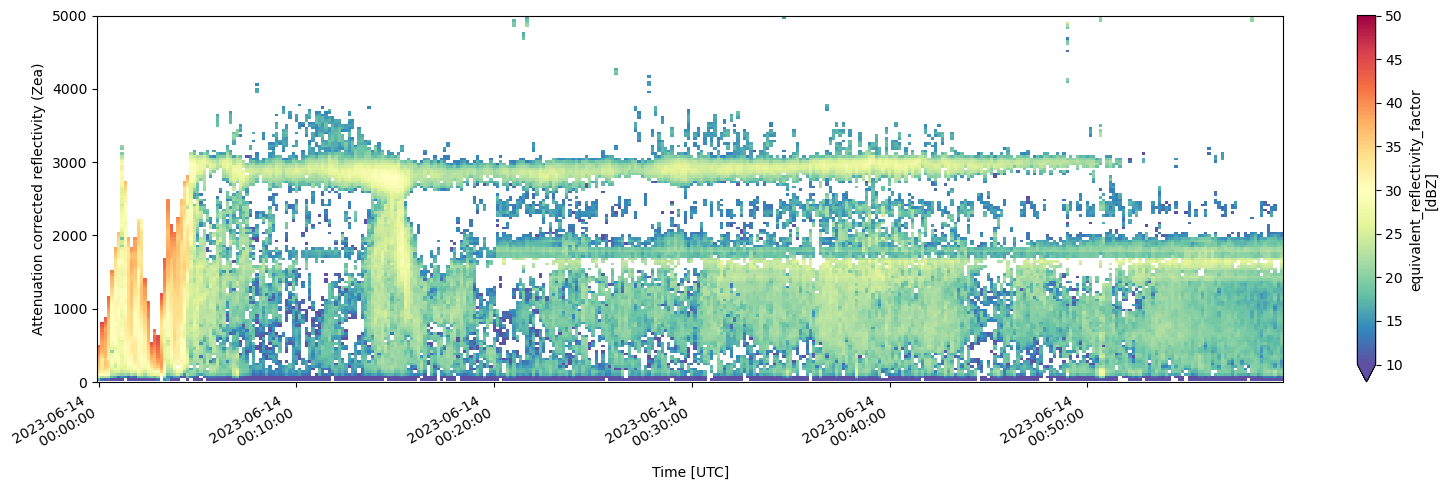

In [89]:
fig = plt.figure(figsize=(16,5))
ds["Ze"].T.plot(cmap='Spectral_r', vmin=10, vmax=50)
plt.xlabel('Time [UTC]'), plt.ylabel('Attenuation corrected reflectivity (Zea)')
plt.ylim(0, 5000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
plt.tight_layout()
plt.savefig("June_14_mrr.png",dpi=500)

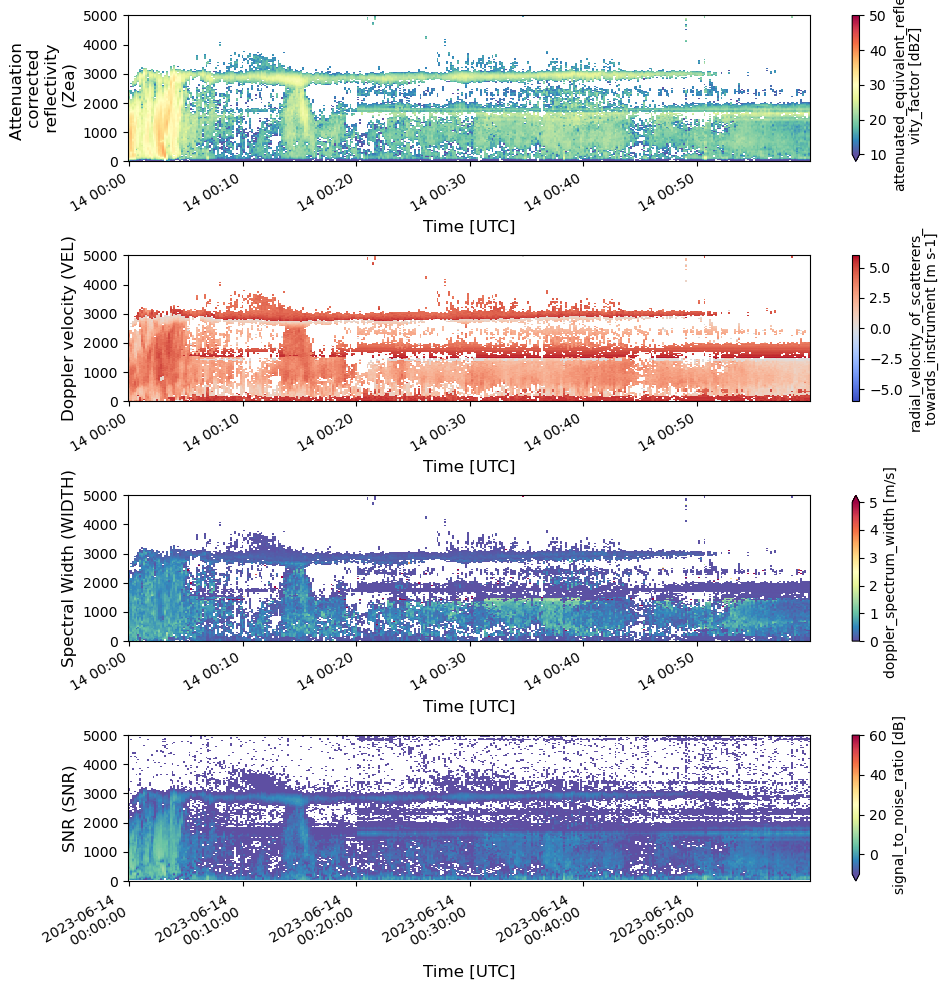

In [90]:
fig, ax = plt.subplots(4, 1, figsize=(10, 10))
ds["Zea"].T.plot(cmap='Spectral_r', vmin=10, vmax=50, ax=ax[0])
ax[0].set_xlabel('Time [UTC]', fontsize=12), ax[0].set_ylabel('Attenuation \n corrected \n reflectivity \n (Zea)', fontsize=12)
ax[0].set_ylim(0, 5000)
ds["VEL"].T.plot(cmap='coolwarm', vmin=-6, vmax=6, ax=ax[1])
ax[1].set_xlabel('Time [UTC]', fontsize=12), ax[1].set_ylabel('Doppler velocity (VEL)', fontsize=12)
ax[1].set_ylim(0, 5000)
ds["WIDTH"].T.plot(cmap='Spectral_r', vmin=0, vmax=5, ax=ax[2])
ax[2].set_xlabel('Time [UTC]', fontsize=12), ax[2].set_ylabel('Spectral Width (WIDTH)', fontsize=12)
ax[2].set_ylim(0, 5000)
ds["SNR"].T.plot(cmap='Spectral_r', vmin=-10, vmax=60, ax=ax[3])
ax[3].set_xlabel('Time [UTC]', fontsize=12), ax[3].set_ylabel('SNR (SNR)', fontsize=12)
ax[3].set_ylim(0, 5000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
fig.tight_layout()